___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

# sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [3]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7180,7181,15632789,Maclean,794,France,Male,30,8,0.000,2,1,1,24113.910,0
3751,3752,15630106,Lo,496,Spain,Male,29,2,0.000,2,1,0,55389.590,0
6995,6996,15696826,James,633,France,Female,32,1,104001.380,1,0,1,36642.650,0
675,676,15754605,Jarvis,563,France,Female,39,5,0.000,2,1,1,17603.810,0
5021,5022,15632793,Wilkinson,638,France,Female,29,9,103417.740,1,1,1,15336.400,0
3598,3599,15632079,Hardy,720,Germany,Female,37,8,156282.790,1,1,0,45985.520,0
8273,8274,15709643,Gray,675,France,Male,32,1,0.000,3,1,0,85901.090,0
2324,2325,15748116,Zetticci,681,France,Female,29,2,148143.840,1,1,1,52021.390,0
5234,5235,15668323,Mbadiwe,678,France,Female,41,1,143443.610,1,1,0,196622.280,1
4848,4849,15807167,Konovalova,635,France,Male,42,1,146766.720,2,0,1,164357.100,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [9]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [10]:
df.duplicated().sum()

0

In [11]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000,0.004,0.006,0.001,-0.006,-0.009,0.007,0.001,0.012,-0.006,-0.017
CustomerId,0.004,1.000,0.005,0.009,-0.015,-0.012,0.017,-0.014,0.002,0.015,-0.006
CreditScore,0.006,0.005,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,0.001,0.009,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,-0.006,-0.015,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,-0.009,-0.012,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.007,0.017,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,0.001,-0.014,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.012,0.002,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.006,0.015,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012


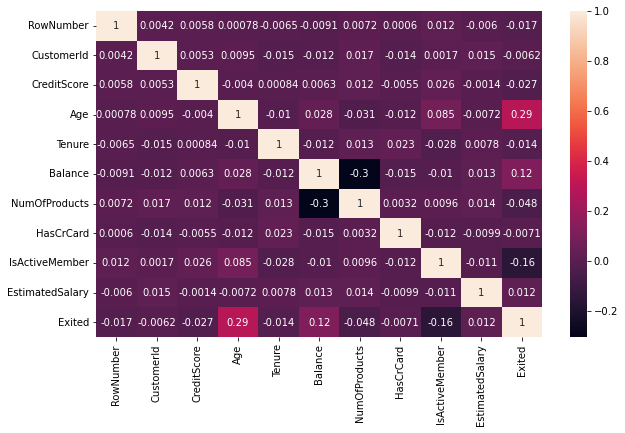

In [12]:
sns.heatmap(df.corr(), annot=True);

### RowNumber & CustomerId & Surname

In [13]:
# Row Number represent the index numbers
df.RowNumber.nunique()

10000

In [14]:
# Each row represents a different customer
df.CustomerId.nunique()

10000

In [15]:
# Surname does not affect the customer decision to close bank account
# And there is too much unique values
df.Surname.nunique()

2932

In [16]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

### Geography

In [17]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

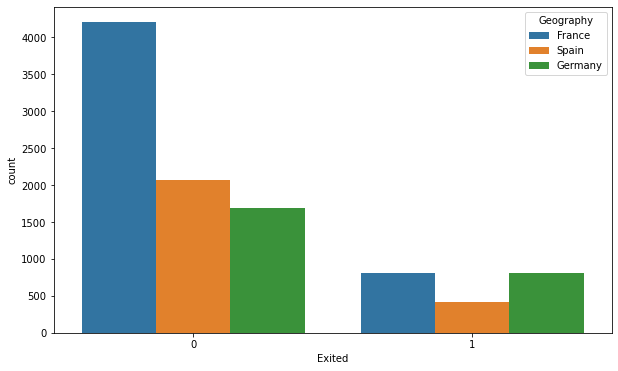

In [18]:
sns.countplot(x="Exited", data= df, hue= "Geography");

### Gender

In [19]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

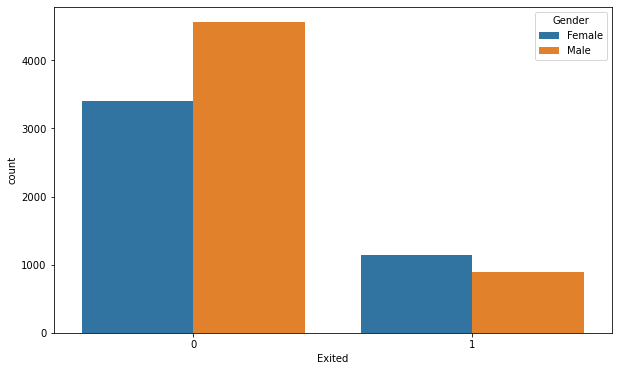

In [20]:
sns.countplot(x="Exited", data= df, hue= "Gender");

### Age

In [21]:
df[["Age", "Tenure"]].head()

,Age,Tenure
0,42,2
1,41,1
2,42,8
3,39,1
4,43,2


In [22]:
# Customer actual age is 
df.Age = df.Age + df.Tenure
df.Age

0       44
1       42
2       50
3       40
4       45
        ..
9995    44
9996    45
9997    43
9998    45
9999    32
Name: Age, Length: 10000, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Exited'>

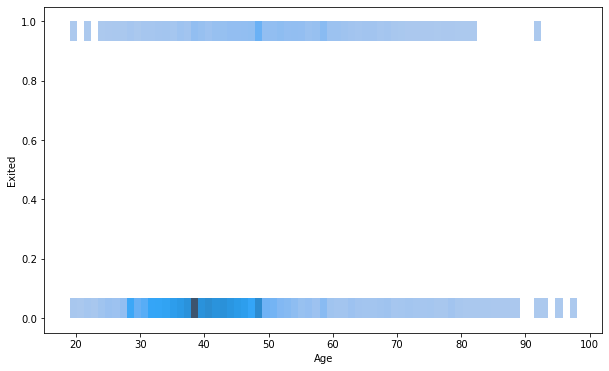

In [23]:
sns.histplot(x="Age", y="Exited", data=df)

### Tenure

In [24]:
df.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

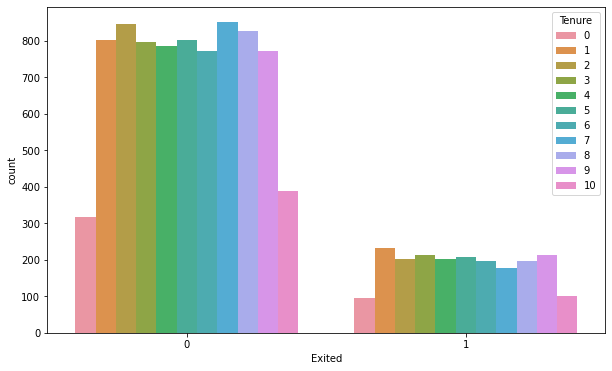

In [25]:
sns.countplot(x="Exited", data=df, hue="Tenure")

### Balance

In [26]:
df.Balance.value_counts().sort_index()

0.000         3617
3768.690         1
12459.190        1
14262.800        1
16893.590        1
              ... 
216109.880       1
221532.800       1
222267.630       1
238387.560       1
250898.090       1
Name: Balance, Length: 6382, dtype: int64

0.000        0.362
130170.820   0.000
105473.740   0.000
85304.270    0.000
159397.750   0.000
              ... 
81556.890    0.000
112687.690   0.000
108698.960   0.000
238387.560   0.000
130142.790   0.000
Name: Balance, Length: 6382, dtype: float64

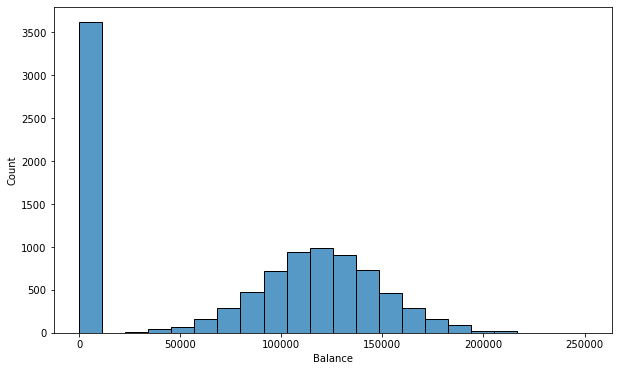

In [27]:
# 1 out of 3 customers in the dataset have no balance in their account
sns.histplot(x="Balance", data=df);
df.Balance.value_counts(normalize=True)

0    3117
1     500
Name: Exited, dtype: int64

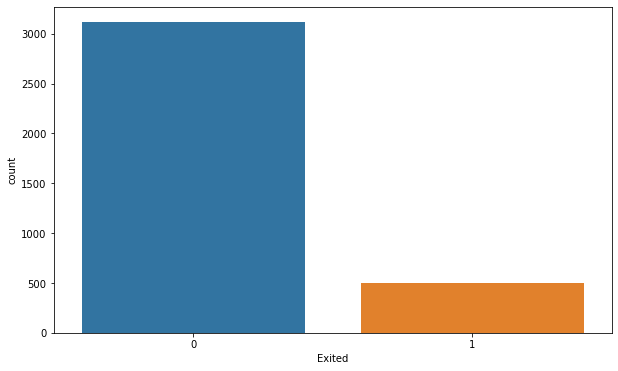

In [28]:
# what is the number of Ecited for Balance = 0
sns.countplot(x = "Exited",data = df[df.Balance == 0]);
df[df.Balance == 0]["Exited"].value_counts()

### NumOfProducts

In [29]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Exited  NumOfProducts
0       2                4242
        1                3675
        3                  46
1       1                1409
        2                 348
        3                 220
        4                  60
Name: NumOfProducts, dtype: int64

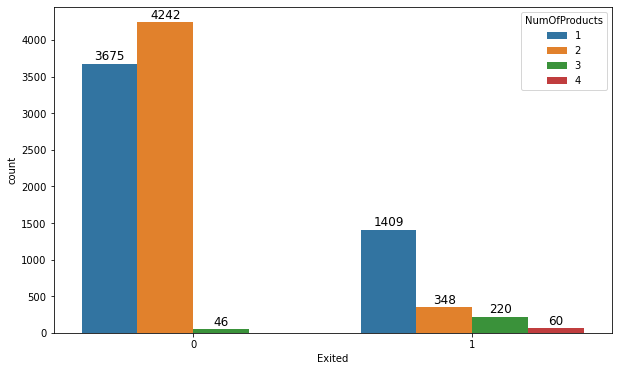

In [30]:
ax = sns.countplot(x = "Exited",data = df, hue= "NumOfProducts");
for i in ax.containers:
    ax.bar_label(i, size=12, padding=1); 

df.groupby("Exited")["NumOfProducts"].value_counts()
# All customers who have 4 number of products are close their account

### HasCrCard

In [31]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

Exited  HasCrCard
0       1            5631
        0            2332
1       1            1424
        0             613
Name: HasCrCard, dtype: int64

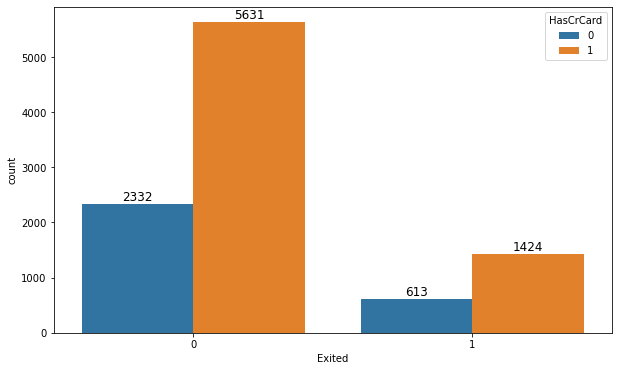

In [32]:
ax = sns.countplot(x = "Exited",data = df, hue= "HasCrCard");
for i in ax.containers:
    ax.bar_label(i, size=12, padding=1); 

df.groupby("Exited")["HasCrCard"].value_counts()

### IsActiveMember

In [33]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
Name: IsActiveMember, dtype: int64

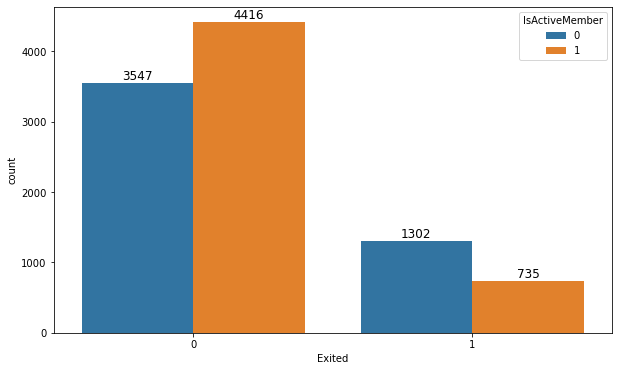

In [34]:
ax = sns.countplot(x = "Exited",data = df, hue= "IsActiveMember");
for i in ax.containers:
    ax.bar_label(i, size=12, padding=1); 

df.groupby("Exited")["IsActiveMember"].value_counts()
# as usual, hesabını kapatan müşterilerin 

### EstimatedSalary

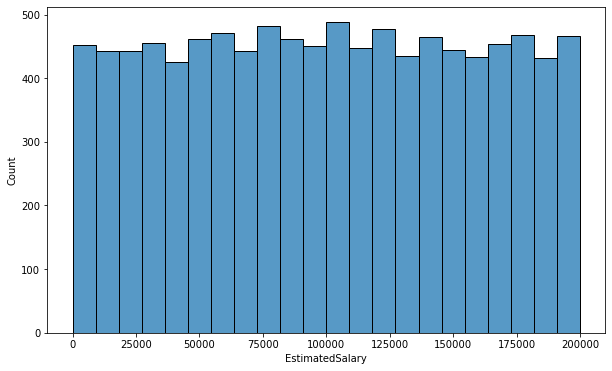

In [35]:
sns.histplot(x="EstimatedSalary", data=df);
# Customer Salaries are distributed homogeneously

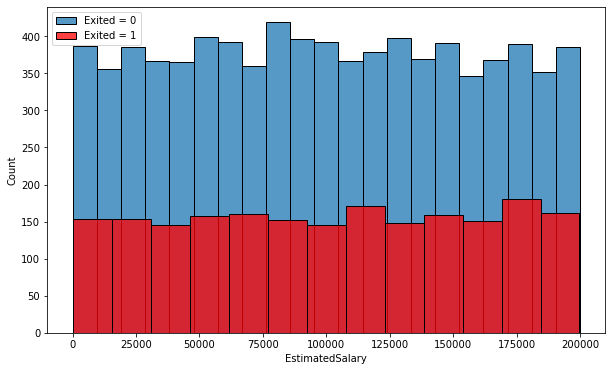

In [36]:
sns.histplot(x="EstimatedSalary", data=df[df.Exited == 0], )
sns.histplot(x="EstimatedSalary", data=df[df.Exited == 1], color="r")
plt.legend(["Exited = 0","Exited = 1"]);
# Salaries are distributed homogeneously in each Exited

### Exited

0   0.796
1   0.204
Name: Exited, dtype: float64

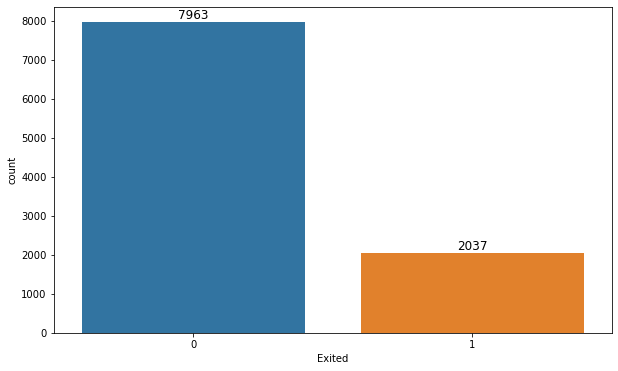

In [37]:
ax = sns.countplot(x = df.Exited)
for i in ax.containers:
    ax.bar_label(i, size=12, padding=1); 
df.Exited.value_counts(normalize=True)
# It is unbalanced data 

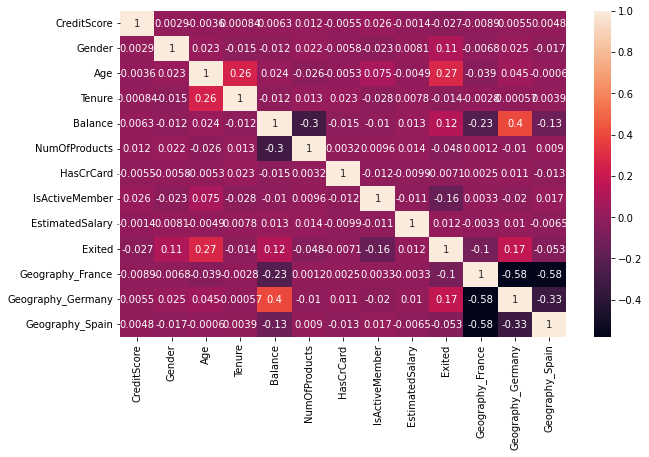

In [251]:
sns.heatmap(df.corr(), annot=True);

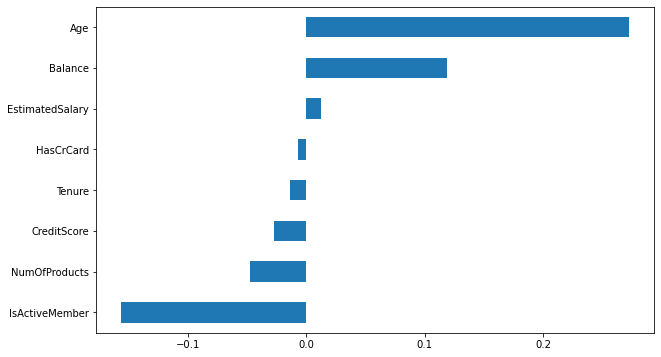

In [39]:
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");
# There is no strong correlation

### Dummy Operation

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc.fit_transform(df[["Geography"]])


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [42]:
enc.get_feature_names_out(["Geography"])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [43]:
geography_df = pd.DataFrame(enc.fit_transform(df[["Geography"]]), columns=enc. get_feature_names_out(["Geography"]))
geography_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.000,0.000,0.000
1,0.000,0.000,1.000
2,1.000,0.000,0.000
3,1.000,0.000,0.000
4,0.000,0.000,1.000
...,...,...,...
9995,1.000,0.000,0.000
9996,1.000,0.000,0.000
9997,1.000,0.000,0.000
9998,0.000,1.000,0.000


In [44]:
df = pd.concat([df, geography_df], axis=1)
df.drop(columns=["Geography"], inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,44,2,0.000,1,1,1,101348.880,1,1.000,0.000,0.000
1,608,Female,42,1,83807.860,1,0,1,112542.580,0,0.000,0.000,1.000
2,502,Female,50,8,159660.800,3,1,0,113931.570,1,1.000,0.000,0.000
3,699,Female,40,1,0.000,2,0,0,93826.630,0,1.000,0.000,0.000
4,850,Female,45,2,125510.820,1,1,1,79084.100,0,0.000,0.000,1.000


In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
categories = ['Male','Female']
enc2 = OrdinalEncoder(categories= [categories])
enc2.fit_transform(df[["Gender"]])

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [47]:
df.Gender = enc2.fit_transform(df[["Gender"]])

In [48]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1.000,44,2,0.000,1,1,1,101348.880,1,1.000,0.000,0.000
1,608,1.000,42,1,83807.860,1,0,1,112542.580,0,0.000,0.000,1.000
2,502,1.000,50,8,159660.800,3,1,0,113931.570,1,1.000,0.000,0.000
3,699,1.000,40,1,0.000,2,0,0,93826.630,0,1.000,0.000,0.000
4,850,1.000,45,2,125510.820,1,1,1,79084.100,0,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.000,44,5,0.000,2,1,0,96270.640,0,1.000,0.000,0.000
9996,516,0.000,45,10,57369.610,1,1,1,101699.770,0,1.000,0.000,0.000
9997,709,1.000,43,7,0.000,1,0,1,42085.580,1,1.000,0.000,0.000
9998,772,0.000,45,3,75075.310,2,1,0,92888.520,1,0.000,1.000,0.000


# Preprocessing of Data
- Train | Test Split, Scalling

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [50]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [51]:
seed = 101

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = seed)

In [53]:
scaler = MinMaxScaler()

In [54]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  roc_auc_score, roc_curve # ,plot_roc_curve indirmedi alttaki kod çalıştırıldı
from scikitplot.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

## without class_weigth

### Create The Model

In [56]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"] )

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                260       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 1000, verbose=1)

Epoch 1/1000
113/113 [==============================] - 1s 2ms/step - loss: 0.5193 - accuracy: 0.7956 - val_loss: 0.4667 - val_accuracy: 0.8025
Epoch 2/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.7956 - val_loss: 0.4533 - val_accuracy: 0.8025
Epoch 3/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7956 - val_loss: 0.4476 - val_accuracy: 0.8025
Epoch 4/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.7957 - val_loss: 0.4399 - val_accuracy: 0.8012
Epoch 5/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.7987 - val_loss: 0.4294 - val_accuracy: 0.8112
Epoch 6/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8086 - val_loss: 0.4164 - val_accuracy: 0.8250
Epoch 7/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.8131 - val_loss: 0.4047 - val_accuracy:

113/113 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8644 - val_loss: 0.3398 - val_accuracy: 0.8750
Epoch 58/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8675 - val_loss: 0.3446 - val_accuracy: 0.8662
Epoch 59/1000
113/113 [==============================] - 0s 996us/step - loss: 0.3293 - accuracy: 0.8665 - val_loss: 0.3525 - val_accuracy: 0.8637
Epoch 60/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8650 - val_loss: 0.3419 - val_accuracy: 0.8687
Epoch 61/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8646 - val_loss: 0.3421 - val_accuracy: 0.8675
Epoch 62/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8633 - val_loss: 0.3593 - val_accuracy: 0.8600
Epoch 63/1000
113/113 [==============================] - 0s 993us/step - loss: 0.3289 - accuracy: 0.8661 - val_loss: 0.3484 - val_accuracy: 0.

113/113 [==============================] - 0s 1ms/step - loss: 0.3200 - accuracy: 0.8674 - val_loss: 0.3342 - val_accuracy: 0.8725
Epoch 114/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3196 - accuracy: 0.8664 - val_loss: 0.3347 - val_accuracy: 0.8750
Epoch 115/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8682 - val_loss: 0.3413 - val_accuracy: 0.8650
Epoch 116/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3195 - accuracy: 0.8694 - val_loss: 0.3376 - val_accuracy: 0.8725
Epoch 117/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8689 - val_loss: 0.3409 - val_accuracy: 0.8675
Epoch 118/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3199 - accuracy: 0.8683 - val_loss: 0.3349 - val_accuracy: 0.8775
Epoch 119/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8686 - val_loss: 0.3329 - val_accuracy: 

Epoch 169/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3135 - accuracy: 0.8712 - val_loss: 0.3478 - val_accuracy: 0.8650
Epoch 170/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8712 - val_loss: 0.3363 - val_accuracy: 0.8725
Epoch 171/1000
113/113 [==============================] - 0s 992us/step - loss: 0.3130 - accuracy: 0.8731 - val_loss: 0.3437 - val_accuracy: 0.8700
Epoch 172/1000
113/113 [==============================] - 0s 992us/step - loss: 0.3137 - accuracy: 0.8736 - val_loss: 0.3447 - val_accuracy: 0.8687
Epoch 173/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.8719 - val_loss: 0.3340 - val_accuracy: 0.8737
Epoch 174/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8718 - val_loss: 0.3433 - val_accuracy: 0.8737
Epoch 175/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.8693 - val_loss: 0.34

Epoch 225/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3080 - accuracy: 0.8739 - val_loss: 0.3380 - val_accuracy: 0.8737
Epoch 226/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8756 - val_loss: 0.3496 - val_accuracy: 0.8662
Epoch 227/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8742 - val_loss: 0.3380 - val_accuracy: 0.8775
Epoch 228/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3096 - accuracy: 0.8743 - val_loss: 0.3409 - val_accuracy: 0.8687
Epoch 229/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3100 - accuracy: 0.8737 - val_loss: 0.3416 - val_accuracy: 0.8750
Epoch 230/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3077 - accuracy: 0.8740 - val_loss: 0.3331 - val_accuracy: 0.8763
Epoch 231/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.8758 - val_loss: 0.3349 -

Epoch 281/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.8743 - val_loss: 0.3414 - val_accuracy: 0.8700
Epoch 282/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8758 - val_loss: 0.3399 - val_accuracy: 0.8712
Epoch 283/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3050 - accuracy: 0.8760 - val_loss: 0.3503 - val_accuracy: 0.8587
Epoch 284/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3060 - accuracy: 0.8756 - val_loss: 0.3372 - val_accuracy: 0.8775
Epoch 285/1000
113/113 [==============================] - 0s 989us/step - loss: 0.3044 - accuracy: 0.8754 - val_loss: 0.3432 - val_accuracy: 0.8662
Epoch 286/1000
113/113 [==============================] - 0s 994us/step - loss: 0.3064 - accuracy: 0.8749 - val_loss: 0.3440 - val_accuracy: 0.8712
Epoch 287/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3044 - accuracy: 0.8744 - val_loss: 0.34

Epoch 337/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8756 - val_loss: 0.3390 - val_accuracy: 0.8712
Epoch 338/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3025 - accuracy: 0.8749 - val_loss: 0.3418 - val_accuracy: 0.8763
Epoch 339/1000
113/113 [==============================] - 0s 992us/step - loss: 0.3028 - accuracy: 0.8769 - val_loss: 0.3476 - val_accuracy: 0.8650
Epoch 340/1000
113/113 [==============================] - 0s 993us/step - loss: 0.3027 - accuracy: 0.8785 - val_loss: 0.3418 - val_accuracy: 0.8725
Epoch 341/1000
113/113 [==============================] - 0s 998us/step - loss: 0.3029 - accuracy: 0.8779 - val_loss: 0.3522 - val_accuracy: 0.8637
Epoch 342/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.8769 - val_loss: 0.3445 - val_accuracy: 0.8737
Epoch 343/1000
113/113 [==============================] - 0s 984us/step - loss: 0.3039 - accuracy: 0.8769 - val_loss: 

Epoch 393/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3004 - accuracy: 0.8754 - val_loss: 0.3554 - val_accuracy: 0.8625
Epoch 394/1000
113/113 [==============================] - 0s 992us/step - loss: 0.3005 - accuracy: 0.8767 - val_loss: 0.3513 - val_accuracy: 0.8687
Epoch 395/1000
113/113 [==============================] - 0s 992us/step - loss: 0.3007 - accuracy: 0.8782 - val_loss: 0.3490 - val_accuracy: 0.8712
Epoch 396/1000
113/113 [==============================] - 0s 990us/step - loss: 0.3002 - accuracy: 0.8776 - val_loss: 0.3538 - val_accuracy: 0.8662
Epoch 397/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3004 - accuracy: 0.8744 - val_loss: 0.3487 - val_accuracy: 0.8700
Epoch 398/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3007 - accuracy: 0.8757 - val_loss: 0.3492 - val_accuracy: 0.8675
Epoch 399/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3001 - accuracy: 0.8781 - val_loss: 0.

Epoch 449/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.8743 - val_loss: 0.3591 - val_accuracy: 0.8600
Epoch 450/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2995 - accuracy: 0.8769 - val_loss: 0.3478 - val_accuracy: 0.8700
Epoch 451/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.8774 - val_loss: 0.3490 - val_accuracy: 0.8712
Epoch 452/1000
113/113 [==============================] - 0s 988us/step - loss: 0.2986 - accuracy: 0.8789 - val_loss: 0.3524 - val_accuracy: 0.8712
Epoch 453/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.8782 - val_loss: 0.3486 - val_accuracy: 0.8725
Epoch 454/1000
113/113 [==============================] - 0s 974us/step - loss: 0.2990 - accuracy: 0.8778 - val_loss: 0.3449 - val_accuracy: 0.8675
Epoch 455/1000
113/113 [==============================] - 0s 992us/step - loss: 0.3003 - accuracy: 0.8751 - val_loss: 0.

Epoch 505/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2975 - accuracy: 0.8778 - val_loss: 0.3480 - val_accuracy: 0.8725
Epoch 506/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.8778 - val_loss: 0.3592 - val_accuracy: 0.8625
Epoch 507/1000
113/113 [==============================] - 0s 996us/step - loss: 0.3014 - accuracy: 0.8761 - val_loss: 0.3449 - val_accuracy: 0.8712
Epoch 508/1000
113/113 [==============================] - 0s 981us/step - loss: 0.2970 - accuracy: 0.8789 - val_loss: 0.3567 - val_accuracy: 0.8612
Epoch 509/1000
113/113 [==============================] - 0s 1000us/step - loss: 0.2993 - accuracy: 0.8782 - val_loss: 0.3502 - val_accuracy: 0.8687
Epoch 510/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2969 - accuracy: 0.8789 - val_loss: 0.3475 - val_accuracy: 0.8725
Epoch 511/1000
113/113 [==============================] - 0s 1000us/step - loss: 0.2972 - accuracy: 0.8758 - val_loss

Epoch 561/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8768 - val_loss: 0.3494 - val_accuracy: 0.8775
Epoch 562/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2968 - accuracy: 0.8794 - val_loss: 0.3554 - val_accuracy: 0.8675
Epoch 563/1000
113/113 [==============================] - 0s 998us/step - loss: 0.2954 - accuracy: 0.8800 - val_loss: 0.3465 - val_accuracy: 0.8737
Epoch 564/1000
113/113 [==============================] - 0s 986us/step - loss: 0.2983 - accuracy: 0.8797 - val_loss: 0.3485 - val_accuracy: 0.8725
Epoch 565/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8792 - val_loss: 0.3506 - val_accuracy: 0.8712
Epoch 566/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.8807 - val_loss: 0.3519 - val_accuracy: 0.8725
Epoch 567/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2962 - accuracy: 0.8786 - val_loss: 0.35

Epoch 617/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2947 - accuracy: 0.8788 - val_loss: 0.3519 - val_accuracy: 0.8662
Epoch 618/1000
113/113 [==============================] - 0s 990us/step - loss: 0.2932 - accuracy: 0.8800 - val_loss: 0.3538 - val_accuracy: 0.8700
Epoch 619/1000
113/113 [==============================] - 0s 998us/step - loss: 0.2954 - accuracy: 0.8788 - val_loss: 0.3623 - val_accuracy: 0.8625
Epoch 620/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.8794 - val_loss: 0.3482 - val_accuracy: 0.8725
Epoch 621/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2941 - accuracy: 0.8807 - val_loss: 0.3514 - val_accuracy: 0.8737
Epoch 622/1000
113/113 [==============================] - 0s 996us/step - loss: 0.2936 - accuracy: 0.8800 - val_loss: 0.3592 - val_accuracy: 0.8612
Epoch 623/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2943 - accuracy: 0.8796 - val_loss: 0.

Epoch 673/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2939 - accuracy: 0.8788 - val_loss: 0.3564 - val_accuracy: 0.8675
Epoch 674/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.8789 - val_loss: 0.3534 - val_accuracy: 0.8687
Epoch 675/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2934 - accuracy: 0.8800 - val_loss: 0.3509 - val_accuracy: 0.8675
Epoch 676/1000
113/113 [==============================] - 0s 999us/step - loss: 0.2922 - accuracy: 0.8793 - val_loss: 0.3616 - val_accuracy: 0.8575
Epoch 677/1000
113/113 [==============================] - 0s 985us/step - loss: 0.2914 - accuracy: 0.8815 - val_loss: 0.3640 - val_accuracy: 0.8562
Epoch 678/1000
113/113 [==============================] - 0s 991us/step - loss: 0.2937 - accuracy: 0.8813 - val_loss: 0.3495 - val_accuracy: 0.8725
Epoch 679/1000
113/113 [==============================] - 0s 995us/step - loss: 0.2936 - accuracy: 0.8790 - val_loss: 

Epoch 729/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.8825 - val_loss: 0.3581 - val_accuracy: 0.8687
Epoch 730/1000
113/113 [==============================] - 0s 990us/step - loss: 0.2909 - accuracy: 0.8819 - val_loss: 0.3594 - val_accuracy: 0.8625
Epoch 731/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2910 - accuracy: 0.8806 - val_loss: 0.3579 - val_accuracy: 0.8662
Epoch 732/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.8807 - val_loss: 0.3625 - val_accuracy: 0.8637
Epoch 733/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2941 - accuracy: 0.8786 - val_loss: 0.3601 - val_accuracy: 0.8662
Epoch 734/1000
113/113 [==============================] - 0s 986us/step - loss: 0.2920 - accuracy: 0.8814 - val_loss: 0.3539 - val_accuracy: 0.8700
Epoch 735/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.8813 - val_loss: 0.36

Epoch 785/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2917 - accuracy: 0.8819 - val_loss: 0.3566 - val_accuracy: 0.8675
Epoch 786/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2892 - accuracy: 0.8821 - val_loss: 0.3607 - val_accuracy: 0.8687
Epoch 787/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2907 - accuracy: 0.8819 - val_loss: 0.3622 - val_accuracy: 0.8662
Epoch 788/1000
113/113 [==============================] - 0s 987us/step - loss: 0.2902 - accuracy: 0.8806 - val_loss: 0.3561 - val_accuracy: 0.8725
Epoch 789/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2916 - accuracy: 0.8814 - val_loss: 0.3600 - val_accuracy: 0.8675
Epoch 790/1000
113/113 [==============================] - 0s 996us/step - loss: 0.2907 - accuracy: 0.8817 - val_loss: 0.3570 - val_accuracy: 0.8650
Epoch 791/1000
113/113 [==============================] - 0s 993us/step - loss: 0.2920 - accuracy: 0.8800 - val_loss: 0.

Epoch 841/1000
113/113 [==============================] - 0s 993us/step - loss: 0.2894 - accuracy: 0.8831 - val_loss: 0.3611 - val_accuracy: 0.8650
Epoch 842/1000
113/113 [==============================] - 0s 980us/step - loss: 0.2904 - accuracy: 0.8828 - val_loss: 0.3687 - val_accuracy: 0.8550
Epoch 843/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2902 - accuracy: 0.8821 - val_loss: 0.3587 - val_accuracy: 0.8675
Epoch 844/1000
113/113 [==============================] - 0s 993us/step - loss: 0.2888 - accuracy: 0.8832 - val_loss: 0.3621 - val_accuracy: 0.8637
Epoch 845/1000
113/113 [==============================] - 0s 991us/step - loss: 0.2887 - accuracy: 0.8843 - val_loss: 0.3670 - val_accuracy: 0.8625
Epoch 846/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.8817 - val_loss: 0.3606 - val_accuracy: 0.8700
Epoch 847/1000
113/113 [==============================] - 0s 994us/step - loss: 0.2891 - accuracy: 0.8833 - val_loss

Epoch 897/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.8825 - val_loss: 0.3590 - val_accuracy: 0.8662
Epoch 898/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2874 - accuracy: 0.8829 - val_loss: 0.3596 - val_accuracy: 0.8662
Epoch 899/1000
113/113 [==============================] - 0s 996us/step - loss: 0.2868 - accuracy: 0.8842 - val_loss: 0.3840 - val_accuracy: 0.8500
Epoch 900/1000
113/113 [==============================] - 0s 998us/step - loss: 0.2873 - accuracy: 0.8826 - val_loss: 0.3603 - val_accuracy: 0.8675
Epoch 901/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2878 - accuracy: 0.8836 - val_loss: 0.3661 - val_accuracy: 0.8637
Epoch 902/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.8836 - val_loss: 0.3634 - val_accuracy: 0.8737
Epoch 903/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.8825 - val_loss: 0.36

Epoch 953/1000
113/113 [==============================] - 0s 998us/step - loss: 0.2872 - accuracy: 0.8851 - val_loss: 0.3658 - val_accuracy: 0.8687
Epoch 954/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2887 - accuracy: 0.8818 - val_loss: 0.3643 - val_accuracy: 0.8625
Epoch 955/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2864 - accuracy: 0.8833 - val_loss: 0.3685 - val_accuracy: 0.8612
Epoch 956/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2864 - accuracy: 0.8856 - val_loss: 0.3682 - val_accuracy: 0.8612
Epoch 957/1000
113/113 [==============================] - 0s 993us/step - loss: 0.2877 - accuracy: 0.8851 - val_loss: 0.3626 - val_accuracy: 0.8700
Epoch 958/1000
113/113 [==============================] - 0s 996us/step - loss: 0.2880 - accuracy: 0.8822 - val_loss: 0.3622 - val_accuracy: 0.8687
Epoch 959/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.8829 - val_loss: 0.

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.519,0.796,0.467,0.803
1,0.480,0.796,0.453,0.803
2,0.471,0.796,0.448,0.803
3,0.462,0.796,0.440,0.801
4,0.452,0.799,0.429,0.811


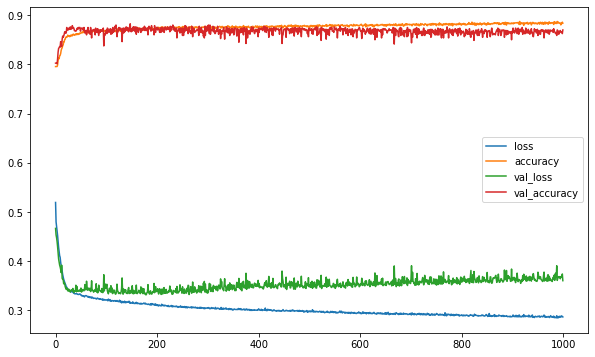

In [60]:
loss_df.plot();

In [61]:
model.evaluate(X_test, y_test, verbose=0 , return_dict=True)

{'loss': 0.38824573159217834, 'accuracy': 0.8460000157356262}

In [62]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 621us/step
[[1534   59]
 [ 249  158]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.73      0.39      0.51       407

    accuracy                           0.85      2000
   macro avg       0.79      0.68      0.71      2000
weighted avg       0.83      0.85      0.83      2000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [63]:
from sklearn.utils import class_weight

### Create The Model

In [252]:
sklearn_weights = class_weight.compute_class_weight('balanced', classes= np.unique(y_train), y = y_train)
sklearn_weights

array([0.62794349, 2.45398773])

In [253]:
df.Exited.value_counts(normalize=True)

0   0.796
1   0.204
Name: Exited, dtype: float64

In [254]:
sklearn_weights = dict(enumerate(sklearn_weights))
sklearn_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [255]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"] )

In [256]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 1000,
          verbose=1, class_weight=sklearn_weights)

Epoch 1/1000
113/113 [==============================] - 1s 3ms/step - loss: 0.6877 - accuracy: 0.7701 - val_loss: 0.6437 - val_accuracy: 0.7325
Epoch 2/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6764 - val_loss: 0.6098 - val_accuracy: 0.6725
Epoch 3/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.6612 - val_loss: 0.6320 - val_accuracy: 0.6425
Epoch 4/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.6701 - val_loss: 0.6191 - val_accuracy: 0.6488
Epoch 5/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.6825 - val_loss: 0.5893 - val_accuracy: 0.6800
Epoch 6/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.6933 - val_loss: 0.5739 - val_accuracy: 0.7100
Epoch 7/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7044 - val_loss: 0.5685 - val_accuracy:

113/113 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8021 - val_loss: 0.4630 - val_accuracy: 0.7850
Epoch 58/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.8092 - val_loss: 0.5026 - val_accuracy: 0.7513
Epoch 59/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8035 - val_loss: 0.5121 - val_accuracy: 0.7375
Epoch 60/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8035 - val_loss: 0.4722 - val_accuracy: 0.7688
Epoch 61/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8037 - val_loss: 0.4615 - val_accuracy: 0.7862
Epoch 62/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8050 - val_loss: 0.5245 - val_accuracy: 0.7337
Epoch 63/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8061 - val_loss: 0.4739 - val_accuracy: 0.7700

113/113 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8087 - val_loss: 0.4692 - val_accuracy: 0.7800
Epoch 114/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8071 - val_loss: 0.5093 - val_accuracy: 0.7462
Epoch 115/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8099 - val_loss: 0.4809 - val_accuracy: 0.7675
Epoch 116/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8079 - val_loss: 0.4744 - val_accuracy: 0.7650
Epoch 117/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8087 - val_loss: 0.5252 - val_accuracy: 0.7350
Epoch 118/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8081 - val_loss: 0.4458 - val_accuracy: 0.7962
Epoch 119/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8129 - val_loss: 0.4845 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8138 - val_loss: 0.5083 - val_accuracy: 0.7600
Epoch 170/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8094 - val_loss: 0.4839 - val_accuracy: 0.7600
Epoch 171/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8108 - val_loss: 0.5342 - val_accuracy: 0.7437
Epoch 172/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8121 - val_loss: 0.5403 - val_accuracy: 0.7362
Epoch 173/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8074 - val_loss: 0.4608 - val_accuracy: 0.7800
Epoch 174/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8138 - val_loss: 0.5162 - val_accuracy: 0.7437
Epoch 175/1000
113/113 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.8119 - val_loss: 0.5281 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8150 - val_loss: 0.4559 - val_accuracy: 0.7812
Epoch 226/1000
113/113 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.8199 - val_loss: 0.4789 - val_accuracy: 0.7700
Epoch 227/1000
113/113 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.8138 - val_loss: 0.5175 - val_accuracy: 0.7437
Epoch 228/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8112 - val_loss: 0.4999 - val_accuracy: 0.7563
Epoch 229/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8104 - val_loss: 0.4335 - val_accuracy: 0.7937
Epoch 230/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8144 - val_loss: 0.4860 - val_accuracy: 0.7638
Epoch 231/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.8146 - val_loss: 0.4343 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8167 - val_loss: 0.4864 - val_accuracy: 0.7675
Epoch 282/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8171 - val_loss: 0.4570 - val_accuracy: 0.7837
Epoch 283/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8181 - val_loss: 0.4781 - val_accuracy: 0.7688
Epoch 284/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8164 - val_loss: 0.4848 - val_accuracy: 0.7675
Epoch 285/1000
113/113 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8178 - val_loss: 0.4610 - val_accuracy: 0.7950
Epoch 286/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8193 - val_loss: 0.4916 - val_accuracy: 0.7575
Epoch 287/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8176 - val_loss: 0.4985 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8165 - val_loss: 0.4470 - val_accuracy: 0.7925
Epoch 338/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8167 - val_loss: 0.4630 - val_accuracy: 0.7875
Epoch 339/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8175 - val_loss: 0.4847 - val_accuracy: 0.7688
Epoch 340/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8142 - val_loss: 0.4632 - val_accuracy: 0.7788
Epoch 341/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8142 - val_loss: 0.5095 - val_accuracy: 0.7625
Epoch 342/1000
113/113 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8213 - val_loss: 0.4821 - val_accuracy: 0.7713
Epoch 343/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8158 - val_loss: 0.4811 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8210 - val_loss: 0.4565 - val_accuracy: 0.7900
Epoch 394/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8197 - val_loss: 0.4936 - val_accuracy: 0.7725
Epoch 395/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8175 - val_loss: 0.4592 - val_accuracy: 0.7800
Epoch 396/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8215 - val_loss: 0.4995 - val_accuracy: 0.7638
Epoch 397/1000
113/113 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.8183 - val_loss: 0.5301 - val_accuracy: 0.7462
Epoch 398/1000
113/113 [==============================] - 0s 3ms/step - loss: 0.4104 - accuracy: 0.8183 - val_loss: 0.4537 - val_accuracy: 0.7887
Epoch 399/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8204 - val_loss: 0.5034 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8228 - val_loss: 0.5268 - val_accuracy: 0.7500
Epoch 450/1000
113/113 [==============================] - 0s 3ms/step - loss: 0.4074 - accuracy: 0.8196 - val_loss: 0.4955 - val_accuracy: 0.7725
Epoch 451/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8217 - val_loss: 0.4961 - val_accuracy: 0.7688
Epoch 452/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8229 - val_loss: 0.4661 - val_accuracy: 0.7825
Epoch 453/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8224 - val_loss: 0.4889 - val_accuracy: 0.7750
Epoch 454/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8208 - val_loss: 0.4440 - val_accuracy: 0.8050
Epoch 455/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8217 - val_loss: 0.5134 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8193 - val_loss: 0.4649 - val_accuracy: 0.7875
Epoch 506/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8221 - val_loss: 0.5155 - val_accuracy: 0.7588
Epoch 507/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8222 - val_loss: 0.4482 - val_accuracy: 0.8000
Epoch 508/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8215 - val_loss: 0.4952 - val_accuracy: 0.7725
Epoch 509/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8199 - val_loss: 0.4665 - val_accuracy: 0.7887
Epoch 510/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8250 - val_loss: 0.4967 - val_accuracy: 0.7675
Epoch 511/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8244 - val_loss: 0.5193 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8186 - val_loss: 0.4288 - val_accuracy: 0.8163
Epoch 562/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8226 - val_loss: 0.4523 - val_accuracy: 0.7975
Epoch 563/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8218 - val_loss: 0.5165 - val_accuracy: 0.7613
Epoch 564/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8244 - val_loss: 0.4695 - val_accuracy: 0.7900
Epoch 565/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8244 - val_loss: 0.5060 - val_accuracy: 0.7613
Epoch 566/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8199 - val_loss: 0.4355 - val_accuracy: 0.8037
Epoch 567/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8224 - val_loss: 0.5058 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8228 - val_loss: 0.4307 - val_accuracy: 0.8150
Epoch 618/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8246 - val_loss: 0.4496 - val_accuracy: 0.8012
Epoch 619/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8260 - val_loss: 0.5050 - val_accuracy: 0.7650
Epoch 620/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8206 - val_loss: 0.4526 - val_accuracy: 0.7987
Epoch 621/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8222 - val_loss: 0.5086 - val_accuracy: 0.7700
Epoch 622/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8272 - val_loss: 0.5324 - val_accuracy: 0.7412
Epoch 623/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8219 - val_loss: 0.5211 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8271 - val_loss: 0.4546 - val_accuracy: 0.8012
Epoch 674/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8263 - val_loss: 0.4774 - val_accuracy: 0.7937
Epoch 675/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8235 - val_loss: 0.4463 - val_accuracy: 0.8125
Epoch 676/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8238 - val_loss: 0.4589 - val_accuracy: 0.8000
Epoch 677/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8249 - val_loss: 0.5650 - val_accuracy: 0.7287
Epoch 678/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8257 - val_loss: 0.4847 - val_accuracy: 0.7900
Epoch 679/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8233 - val_loss: 0.4767 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8300 - val_loss: 0.5067 - val_accuracy: 0.7625
Epoch 730/1000
113/113 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.8268 - val_loss: 0.4925 - val_accuracy: 0.7738
Epoch 731/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8256 - val_loss: 0.5101 - val_accuracy: 0.7688
Epoch 732/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8263 - val_loss: 0.4924 - val_accuracy: 0.7825
Epoch 733/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8249 - val_loss: 0.4822 - val_accuracy: 0.7825
Epoch 734/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8265 - val_loss: 0.4298 - val_accuracy: 0.8188
Epoch 735/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8267 - val_loss: 0.5027 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8251 - val_loss: 0.4628 - val_accuracy: 0.8025
Epoch 786/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8264 - val_loss: 0.4794 - val_accuracy: 0.7912
Epoch 787/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8249 - val_loss: 0.4822 - val_accuracy: 0.7812
Epoch 788/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8265 - val_loss: 0.4705 - val_accuracy: 0.7900
Epoch 789/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8279 - val_loss: 0.4729 - val_accuracy: 0.7937
Epoch 790/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8279 - val_loss: 0.4649 - val_accuracy: 0.7975
Epoch 791/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8268 - val_loss: 0.5062 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8265 - val_loss: 0.4943 - val_accuracy: 0.7763
Epoch 842/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8258 - val_loss: 0.5087 - val_accuracy: 0.7625
Epoch 843/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8214 - val_loss: 0.4695 - val_accuracy: 0.8000
Epoch 844/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8256 - val_loss: 0.4637 - val_accuracy: 0.8050
Epoch 845/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8288 - val_loss: 0.4833 - val_accuracy: 0.7937
Epoch 846/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8285 - val_loss: 0.4510 - val_accuracy: 0.8150
Epoch 847/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8265 - val_loss: 0.4574 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8282 - val_loss: 0.4877 - val_accuracy: 0.7887
Epoch 898/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8250 - val_loss: 0.4514 - val_accuracy: 0.8112
Epoch 899/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8292 - val_loss: 0.5462 - val_accuracy: 0.7563
Epoch 900/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8240 - val_loss: 0.4796 - val_accuracy: 0.7825
Epoch 901/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8265 - val_loss: 0.4878 - val_accuracy: 0.7925
Epoch 902/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8269 - val_loss: 0.5098 - val_accuracy: 0.7713
Epoch 903/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8267 - val_loss: 0.4819 - val_accuracy: 

113/113 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8253 - val_loss: 0.4814 - val_accuracy: 0.7962
Epoch 954/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8299 - val_loss: 0.5134 - val_accuracy: 0.7800
Epoch 955/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8308 - val_loss: 0.4828 - val_accuracy: 0.7912
Epoch 956/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8279 - val_loss: 0.4815 - val_accuracy: 0.8037
Epoch 957/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8272 - val_loss: 0.4769 - val_accuracy: 0.7962
Epoch 958/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8307 - val_loss: 0.4936 - val_accuracy: 0.7937
Epoch 959/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8296 - val_loss: 0.4920 - val_accuracy: 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

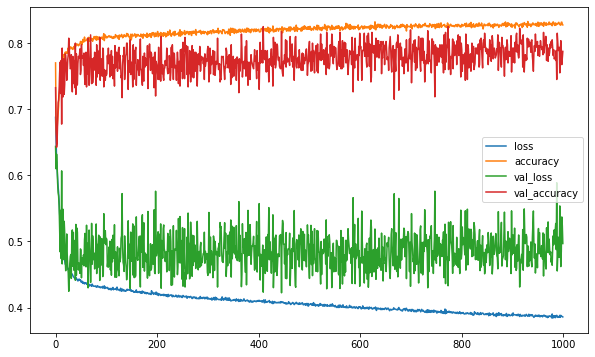

In [257]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [258]:
model.evaluate(X_test, y_test, verbose=0, return_dict=True)

{'loss': 0.4946720004081726, 'accuracy': 0.7705000042915344}

In [259]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1262  331]
 [ 128  279]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1593
           1       0.46      0.69      0.55       407

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.70      2000
weighted avg       0.82      0.77      0.79      2000



#### Evaluate the model with recall + class_weight 

In [260]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "Recall" )
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, 
          epochs = 1000, verbose=1, class_weight=sklearn_weights)

Epoch 1/1000
113/113 [==============================] - 1s 3ms/step - loss: 0.6961 - recall: 0.5795 - val_loss: 0.6938 - val_recall: 0.7152
Epoch 2/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.6706 - recall: 0.7058 - val_loss: 0.6661 - val_recall: 0.7722
Epoch 3/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.6360 - recall: 0.6936 - val_loss: 0.6473 - val_recall: 0.8101
Epoch 4/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.6122 - recall: 0.6868 - val_loss: 0.6262 - val_recall: 0.7785
Epoch 5/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.5956 - recall: 0.7092 - val_loss: 0.5799 - val_recall: 0.7089
Epoch 6/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.5825 - recall: 0.6929 - val_loss: 0.5721 - val_recall: 0.6962
Epoch 7/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.5713 - recall: 0.7092 - val_loss: 0.5676 - val_recall: 0.7215
Epoch 8/1000
113/113

113/113 [==============================] - 0s 2ms/step - loss: 0.4464 - recall: 0.7738 - val_loss: 0.5107 - val_recall: 0.7911
Epoch 60/1000
113/113 [==============================] - 0s 3ms/step - loss: 0.4469 - recall: 0.7745 - val_loss: 0.4720 - val_recall: 0.7658
Epoch 61/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4468 - recall: 0.7758 - val_loss: 0.4463 - val_recall: 0.7595
Epoch 62/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4459 - recall: 0.7738 - val_loss: 0.5415 - val_recall: 0.8038
Epoch 63/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4450 - recall: 0.7738 - val_loss: 0.5198 - val_recall: 0.8038
Epoch 64/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4441 - recall: 0.7812 - val_loss: 0.5018 - val_recall: 0.8038
Epoch 65/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4433 - recall: 0.7826 - val_loss: 0.4304 - val_recall: 0.7342
Epoch 66/1000
113/113 [====

113/113 [==============================] - 0s 2ms/step - loss: 0.4319 - recall: 0.7826 - val_loss: 0.5339 - val_recall: 0.7911
Epoch 118/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4312 - recall: 0.7867 - val_loss: 0.4379 - val_recall: 0.7278
Epoch 119/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4311 - recall: 0.7867 - val_loss: 0.4766 - val_recall: 0.7848
Epoch 120/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4320 - recall: 0.7819 - val_loss: 0.4171 - val_recall: 0.7025
Epoch 121/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4308 - recall: 0.7894 - val_loss: 0.4453 - val_recall: 0.7215
Epoch 122/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4322 - recall: 0.7785 - val_loss: 0.5255 - val_recall: 0.7848
Epoch 123/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4305 - recall: 0.7860 - val_loss: 0.4865 - val_recall: 0.7848
Epoch 124/1000
113/11

Epoch 175/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4250 - recall: 0.7935 - val_loss: 0.5495 - val_recall: 0.7911
Epoch 176/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4240 - recall: 0.7914 - val_loss: 0.4741 - val_recall: 0.7595
Epoch 177/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4233 - recall: 0.7860 - val_loss: 0.4987 - val_recall: 0.7848
Epoch 178/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4234 - recall: 0.7969 - val_loss: 0.4531 - val_recall: 0.7658
Epoch 179/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4235 - recall: 0.7928 - val_loss: 0.4610 - val_recall: 0.7785
Epoch 180/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4228 - recall: 0.7880 - val_loss: 0.4652 - val_recall: 0.7785
Epoch 181/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4213 - recall: 0.7928 - val_loss: 0.4726 - val_recall: 0.7722
Epoch 

Epoch 233/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4165 - recall: 0.7928 - val_loss: 0.4981 - val_recall: 0.7722
Epoch 234/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4154 - recall: 0.8023 - val_loss: 0.4975 - val_recall: 0.7848
Epoch 235/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4173 - recall: 0.8030 - val_loss: 0.4323 - val_recall: 0.7215
Epoch 236/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4155 - recall: 0.7942 - val_loss: 0.4862 - val_recall: 0.7911
Epoch 237/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4146 - recall: 0.8016 - val_loss: 0.4864 - val_recall: 0.7658
Epoch 238/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4140 - recall: 0.7948 - val_loss: 0.4808 - val_recall: 0.7848
Epoch 239/1000
113/113 [==============================] - 0s 2ms/step - loss: 0.4161 - recall: 0.7948 - val_loss: 0.4866 - val_recall: 0.7848
Epoch 

Epoch 291/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4129 - recall: 0.8064 - val_loss: 0.4740 - val_recall: 0.7468
Epoch 292/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4123 - recall: 0.7935 - val_loss: 0.5522 - val_recall: 0.8038
Epoch 293/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4113 - recall: 0.8030 - val_loss: 0.5105 - val_recall: 0.7848
Epoch 294/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4110 - recall: 0.7982 - val_loss: 0.5375 - val_recall: 0.7975
Epoch 295/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4104 - recall: 0.7989 - val_loss: 0.4543 - val_recall: 0.7532
Epoch 296/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4098 - recall: 0.7989 - val_loss: 0.4988 - val_recall: 0.7468
Epoch 297/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4138 - recall: 0.7962 - val_loss: 0.4731 - val_recall: 0.7722
Epoch 

Epoch 349/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4086 - recall: 0.7989 - val_loss: 0.4698 - val_recall: 0.7658
Epoch 350/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4080 - recall: 0.8003 - val_loss: 0.4817 - val_recall: 0.7722
Epoch 351/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4071 - recall: 0.8010 - val_loss: 0.4734 - val_recall: 0.7658
Epoch 352/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4093 - recall: 0.7976 - val_loss: 0.5136 - val_recall: 0.7848
Epoch 353/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4076 - recall: 0.7996 - val_loss: 0.4933 - val_recall: 0.7848
Epoch 354/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4087 - recall: 0.7996 - val_loss: 0.4638 - val_recall: 0.7595
Epoch 355/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4100 - recall: 0.8023 - val_loss: 0.4899 - val_recall: 0.7532
Epoch 

Epoch 407/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4054 - recall: 0.7996 - val_loss: 0.4463 - val_recall: 0.7405
Epoch 408/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4050 - recall: 0.8077 - val_loss: 0.4864 - val_recall: 0.7595
Epoch 409/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4058 - recall: 0.8037 - val_loss: 0.5075 - val_recall: 0.7785
Epoch 410/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4047 - recall: 0.8050 - val_loss: 0.4285 - val_recall: 0.7152
Epoch 411/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4078 - recall: 0.7969 - val_loss: 0.5086 - val_recall: 0.7911
Epoch 412/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4053 - recall: 0.8023 - val_loss: 0.5084 - val_recall: 0.7785
Epoch 413/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4041 - recall: 0.8091 - val_loss: 0.5017 - val_recall: 0.7848
Epoch 

Epoch 465/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4020 - recall: 0.8030 - val_loss: 0.4817 - val_recall: 0.7848
Epoch 466/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4027 - recall: 0.8057 - val_loss: 0.4833 - val_recall: 0.7658
Epoch 467/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4041 - recall: 0.8057 - val_loss: 0.4992 - val_recall: 0.7848
Epoch 468/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4038 - recall: 0.8023 - val_loss: 0.5310 - val_recall: 0.7975
Epoch 469/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4030 - recall: 0.8023 - val_loss: 0.5219 - val_recall: 0.7911
Epoch 470/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4007 - recall: 0.8077 - val_loss: 0.4696 - val_recall: 0.7658
Epoch 471/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4029 - recall: 0.7948 - val_loss: 0.5533 - val_recall: 0.7975
Epoch 

Epoch 523/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3995 - recall: 0.8050 - val_loss: 0.4544 - val_recall: 0.7342
Epoch 524/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3991 - recall: 0.8043 - val_loss: 0.5490 - val_recall: 0.7975
Epoch 525/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4028 - recall: 0.8016 - val_loss: 0.4667 - val_recall: 0.7595
Epoch 526/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4003 - recall: 0.8023 - val_loss: 0.4789 - val_recall: 0.7722
Epoch 527/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3988 - recall: 0.8050 - val_loss: 0.5135 - val_recall: 0.7848
Epoch 528/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4003 - recall: 0.7989 - val_loss: 0.4679 - val_recall: 0.7848
Epoch 529/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4002 - recall: 0.8037 - val_loss: 0.4805 - val_recall: 0.7848
Epoch 

Epoch 581/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3975 - recall: 0.8071 - val_loss: 0.5046 - val_recall: 0.7722
Epoch 582/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3971 - recall: 0.8111 - val_loss: 0.4641 - val_recall: 0.7532
Epoch 583/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4018 - recall: 0.8057 - val_loss: 0.4768 - val_recall: 0.7658
Epoch 584/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3991 - recall: 0.8091 - val_loss: 0.4601 - val_recall: 0.7342
Epoch 585/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3989 - recall: 0.8098 - val_loss: 0.4219 - val_recall: 0.7089
Epoch 586/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3983 - recall: 0.8057 - val_loss: 0.4531 - val_recall: 0.7532
Epoch 587/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3995 - recall: 0.7989 - val_loss: 0.5560 - val_recall: 0.7975
Epoch 

Epoch 639/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3944 - recall: 0.8064 - val_loss: 0.5092 - val_recall: 0.7658
Epoch 640/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3972 - recall: 0.8057 - val_loss: 0.4704 - val_recall: 0.7595
Epoch 641/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3965 - recall: 0.8105 - val_loss: 0.4863 - val_recall: 0.7595
Epoch 642/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3939 - recall: 0.8098 - val_loss: 0.4671 - val_recall: 0.7342
Epoch 643/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3988 - recall: 0.8043 - val_loss: 0.5154 - val_recall: 0.7785
Epoch 644/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3953 - recall: 0.8125 - val_loss: 0.4565 - val_recall: 0.7342
Epoch 645/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3962 - recall: 0.8105 - val_loss: 0.4897 - val_recall: 0.7595
Epoch 

Epoch 697/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3926 - recall: 0.8193 - val_loss: 0.4782 - val_recall: 0.7405
Epoch 698/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3935 - recall: 0.8145 - val_loss: 0.4638 - val_recall: 0.7532
Epoch 699/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3960 - recall: 0.8125 - val_loss: 0.4944 - val_recall: 0.7468
Epoch 700/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3952 - recall: 0.8064 - val_loss: 0.4427 - val_recall: 0.7215
Epoch 701/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3963 - recall: 0.8037 - val_loss: 0.5040 - val_recall: 0.7595
Epoch 702/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3933 - recall: 0.8098 - val_loss: 0.5657 - val_recall: 0.8038
Epoch 703/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3959 - recall: 0.8125 - val_loss: 0.5312 - val_recall: 0.7785
Epoch 

Epoch 755/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3928 - recall: 0.8105 - val_loss: 0.4809 - val_recall: 0.7532
Epoch 756/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3921 - recall: 0.8084 - val_loss: 0.5534 - val_recall: 0.7848
Epoch 757/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3920 - recall: 0.8125 - val_loss: 0.5069 - val_recall: 0.7658
Epoch 758/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3932 - recall: 0.8071 - val_loss: 0.5200 - val_recall: 0.7595
Epoch 759/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3921 - recall: 0.8111 - val_loss: 0.4874 - val_recall: 0.7215
Epoch 760/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3942 - recall: 0.8084 - val_loss: 0.5384 - val_recall: 0.7975
Epoch 761/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3922 - recall: 0.8213 - val_loss: 0.5092 - val_recall: 0.7532
Epoch 

Epoch 813/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3901 - recall: 0.8139 - val_loss: 0.4845 - val_recall: 0.7215
Epoch 814/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3881 - recall: 0.8186 - val_loss: 0.5363 - val_recall: 0.7722
Epoch 815/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3896 - recall: 0.8159 - val_loss: 0.5295 - val_recall: 0.7532
Epoch 816/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3898 - recall: 0.8111 - val_loss: 0.5205 - val_recall: 0.7595
Epoch 817/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3887 - recall: 0.8057 - val_loss: 0.5083 - val_recall: 0.7532
Epoch 818/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3907 - recall: 0.8145 - val_loss: 0.4883 - val_recall: 0.7152
Epoch 819/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3900 - recall: 0.8152 - val_loss: 0.5203 - val_recall: 0.7532
Epoch 

Epoch 871/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3896 - recall: 0.8159 - val_loss: 0.5081 - val_recall: 0.7658
Epoch 872/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3895 - recall: 0.8043 - val_loss: 0.4596 - val_recall: 0.7152
Epoch 873/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3892 - recall: 0.8037 - val_loss: 0.5708 - val_recall: 0.7785
Epoch 874/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3924 - recall: 0.8077 - val_loss: 0.5246 - val_recall: 0.7785
Epoch 875/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3901 - recall: 0.8159 - val_loss: 0.5277 - val_recall: 0.7595
Epoch 876/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3899 - recall: 0.8091 - val_loss: 0.5005 - val_recall: 0.7342
Epoch 877/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3909 - recall: 0.8077 - val_loss: 0.4833 - val_recall: 0.7152
Epoch 

Epoch 929/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3880 - recall: 0.8145 - val_loss: 0.5055 - val_recall: 0.7278
Epoch 930/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3869 - recall: 0.8186 - val_loss: 0.4920 - val_recall: 0.7089
Epoch 931/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3856 - recall: 0.8159 - val_loss: 0.5522 - val_recall: 0.7658
Epoch 932/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3871 - recall: 0.8125 - val_loss: 0.4765 - val_recall: 0.7025
Epoch 933/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3888 - recall: 0.8057 - val_loss: 0.4985 - val_recall: 0.7278
Epoch 934/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3875 - recall: 0.8159 - val_loss: 0.5075 - val_recall: 0.7342
Epoch 935/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3888 - recall: 0.8118 - val_loss: 0.4825 - val_recall: 0.6835
Epoch 

Epoch 987/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3875 - recall: 0.8145 - val_loss: 0.5149 - val_recall: 0.7215
Epoch 988/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3882 - recall: 0.8023 - val_loss: 0.5859 - val_recall: 0.7785
Epoch 989/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3847 - recall: 0.8145 - val_loss: 0.4632 - val_recall: 0.7025
Epoch 990/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3857 - recall: 0.8186 - val_loss: 0.4890 - val_recall: 0.7342
Epoch 991/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3867 - recall: 0.8105 - val_loss: 0.5522 - val_recall: 0.7405
Epoch 992/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3850 - recall: 0.8105 - val_loss: 0.5059 - val_recall: 0.7278
Epoch 993/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3860 - recall: 0.8152 - val_loss: 0.5002 - val_recall: 0.7152
Epoch 

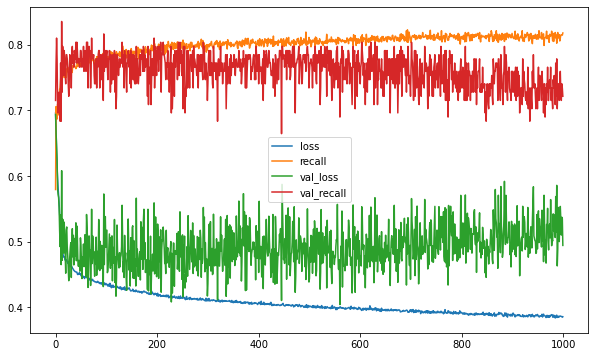

In [261]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [262]:
model.evaluate(X_test, y_test, verbose=0, return_dict=True)

{'loss': 0.48736241459846497, 'recall': 0.6535626649856567}

In [263]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 611us/step
[[1304  289]
 [ 141  266]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1593
           1       0.48      0.65      0.55       407

    accuracy                           0.79      2000
   macro avg       0.69      0.74      0.71      2000
weighted avg       0.82      0.79      0.80      2000



#### Evaluate the model with precision and recall + class_weight

In [269]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = [ "Precision","Recall"] )
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, 
          epochs = 1000, verbose=1, class_weight=sklearn_weights)

Epoch 1/1000
113/113 [==============================] - 1s 2ms/step - loss: 0.6839 - precision: 0.2426 - recall: 0.2738 - val_loss: 0.6433 - val_precision: 0.2939 - val_recall: 0.4873
Epoch 2/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.6428 - precision: 0.3093 - recall: 0.6345 - val_loss: 0.5991 - val_precision: 0.3498 - val_recall: 0.7152
Epoch 3/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.6088 - precision: 0.3378 - recall: 0.6909 - val_loss: 0.6239 - val_precision: 0.3361 - val_recall: 0.7595
Epoch 4/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.5907 - precision: 0.3614 - recall: 0.6950 - val_loss: 0.6141 - val_precision: 0.3324 - val_recall: 0.7342
Epoch 5/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.5767 - precision: 0.3750 - recall: 0.7052 - val_loss: 0.5543 - val_precision: 0.3889 - val_recall: 0.6646
Epoch 6/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.56

113/113 [==============================] - 0s 1ms/step - loss: 0.4561 - precision: 0.4980 - recall: 0.7690 - val_loss: 0.4825 - val_precision: 0.4549 - val_recall: 0.7658
Epoch 46/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4571 - precision: 0.4969 - recall: 0.7663 - val_loss: 0.4606 - val_precision: 0.4637 - val_recall: 0.7278
Epoch 47/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4572 - precision: 0.5002 - recall: 0.7615 - val_loss: 0.4926 - val_precision: 0.4384 - val_recall: 0.7658
Epoch 48/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4579 - precision: 0.4945 - recall: 0.7690 - val_loss: 0.4564 - val_precision: 0.4744 - val_recall: 0.7025
Epoch 49/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4564 - precision: 0.4978 - recall: 0.7643 - val_loss: 0.4607 - val_precision: 0.4661 - val_recall: 0.7405
Epoch 50/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4563 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4405 - precision: 0.5120 - recall: 0.7677 - val_loss: 0.5133 - val_precision: 0.4161 - val_recall: 0.7848
Epoch 90/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4400 - precision: 0.5101 - recall: 0.7704 - val_loss: 0.5013 - val_precision: 0.4146 - val_recall: 0.7532
Epoch 91/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4400 - precision: 0.5117 - recall: 0.7711 - val_loss: 0.4522 - val_precision: 0.4810 - val_recall: 0.7215
Epoch 92/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4398 - precision: 0.5131 - recall: 0.7711 - val_loss: 0.5083 - val_precision: 0.4286 - val_recall: 0.7785
Epoch 93/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4387 - precision: 0.5149 - recall: 0.7731 - val_loss: 0.4963 - val_precision: 0.4265 - val_recall: 0.7532
Epoch 94/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4414 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4310 - precision: 0.5231 - recall: 0.7779 - val_loss: 0.5096 - val_precision: 0.4241 - val_recall: 0.7785
Epoch 134/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4288 - precision: 0.5176 - recall: 0.7806 - val_loss: 0.4388 - val_precision: 0.4893 - val_recall: 0.7215
Epoch 135/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4298 - precision: 0.5289 - recall: 0.7765 - val_loss: 0.5111 - val_precision: 0.4301 - val_recall: 0.7785
Epoch 136/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4292 - precision: 0.5170 - recall: 0.7765 - val_loss: 0.4333 - val_precision: 0.4891 - val_recall: 0.7089
Epoch 137/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4306 - precision: 0.5190 - recall: 0.7799 - val_loss: 0.4979 - val_precision: 0.4306 - val_recall: 0.7658
Epoch 138/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4286 

113/113 [==============================] - 0s 1ms/step - loss: 0.4244 - precision: 0.5282 - recall: 0.7751 - val_loss: 0.5146 - val_precision: 0.4212 - val_recall: 0.7785
Epoch 178/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4234 - precision: 0.5194 - recall: 0.7731 - val_loss: 0.4439 - val_precision: 0.4792 - val_recall: 0.7278
Epoch 179/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4247 - precision: 0.5278 - recall: 0.7867 - val_loss: 0.4516 - val_precision: 0.4779 - val_recall: 0.7532
Epoch 180/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4239 - precision: 0.5279 - recall: 0.7853 - val_loss: 0.4491 - val_precision: 0.4877 - val_recall: 0.7532
Epoch 181/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4247 - precision: 0.5274 - recall: 0.7772 - val_loss: 0.4886 - val_precision: 0.4494 - val_recall: 0.7595
Epoch 182/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4237 

113/113 [==============================] - 0s 1ms/step - loss: 0.4206 - precision: 0.5313 - recall: 0.7833 - val_loss: 0.4725 - val_precision: 0.4621 - val_recall: 0.7722
Epoch 222/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4185 - precision: 0.5331 - recall: 0.7826 - val_loss: 0.4875 - val_precision: 0.4532 - val_recall: 0.7658
Epoch 223/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4214 - precision: 0.5321 - recall: 0.7833 - val_loss: 0.4952 - val_precision: 0.4321 - val_recall: 0.7658
Epoch 224/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4197 - precision: 0.5318 - recall: 0.7833 - val_loss: 0.4986 - val_precision: 0.4522 - val_recall: 0.7785
Epoch 225/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4203 - precision: 0.5293 - recall: 0.7846 - val_loss: 0.4473 - val_precision: 0.4715 - val_recall: 0.7342
Epoch 226/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4199 

113/113 [==============================] - 0s 1ms/step - loss: 0.4175 - precision: 0.5382 - recall: 0.7853 - val_loss: 0.4428 - val_precision: 0.4873 - val_recall: 0.7278
Epoch 266/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4173 - precision: 0.5392 - recall: 0.7799 - val_loss: 0.5016 - val_precision: 0.4301 - val_recall: 0.7595
Epoch 267/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4182 - precision: 0.5355 - recall: 0.7840 - val_loss: 0.5178 - val_precision: 0.4225 - val_recall: 0.7595
Epoch 268/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4184 - precision: 0.5352 - recall: 0.7806 - val_loss: 0.5205 - val_precision: 0.4271 - val_recall: 0.7785
Epoch 269/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4157 - precision: 0.5294 - recall: 0.7840 - val_loss: 0.4609 - val_precision: 0.4696 - val_recall: 0.7342
Epoch 270/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4168 

113/113 [==============================] - 0s 1ms/step - loss: 0.4135 - precision: 0.5374 - recall: 0.7853 - val_loss: 0.5055 - val_precision: 0.4420 - val_recall: 0.7722
Epoch 310/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4137 - precision: 0.5376 - recall: 0.7860 - val_loss: 0.4762 - val_precision: 0.4504 - val_recall: 0.7468
Epoch 311/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4139 - precision: 0.5334 - recall: 0.7819 - val_loss: 0.4660 - val_precision: 0.4553 - val_recall: 0.7405
Epoch 312/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4155 - precision: 0.5412 - recall: 0.7846 - val_loss: 0.5252 - val_precision: 0.4404 - val_recall: 0.7722
Epoch 313/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4145 - precision: 0.5357 - recall: 0.7955 - val_loss: 0.5135 - val_precision: 0.4332 - val_recall: 0.7595
Epoch 314/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4138 

113/113 [==============================] - 0s 1ms/step - loss: 0.4123 - precision: 0.5372 - recall: 0.7894 - val_loss: 0.4921 - val_precision: 0.4566 - val_recall: 0.7658
Epoch 354/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4113 - precision: 0.5410 - recall: 0.7928 - val_loss: 0.4454 - val_precision: 0.4855 - val_recall: 0.7405
Epoch 355/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4120 - precision: 0.5373 - recall: 0.7880 - val_loss: 0.5046 - val_precision: 0.4342 - val_recall: 0.7722
Epoch 356/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4107 - precision: 0.5385 - recall: 0.7894 - val_loss: 0.4740 - val_precision: 0.4566 - val_recall: 0.7658
Epoch 357/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4124 - precision: 0.5353 - recall: 0.7942 - val_loss: 0.5171 - val_precision: 0.4393 - val_recall: 0.7785
Epoch 358/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4133 

113/113 [==============================] - 0s 1ms/step - loss: 0.4093 - precision: 0.5365 - recall: 0.7942 - val_loss: 0.5060 - val_precision: 0.4496 - val_recall: 0.7911
Epoch 398/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4095 - precision: 0.5375 - recall: 0.7846 - val_loss: 0.4713 - val_precision: 0.4630 - val_recall: 0.7532
Epoch 399/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4083 - precision: 0.5436 - recall: 0.7914 - val_loss: 0.5043 - val_precision: 0.4296 - val_recall: 0.7532
Epoch 400/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4081 - precision: 0.5426 - recall: 0.7921 - val_loss: 0.5198 - val_precision: 0.4448 - val_recall: 0.7911
Epoch 401/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4104 - precision: 0.5355 - recall: 0.7901 - val_loss: 0.4434 - val_precision: 0.4711 - val_recall: 0.7215
Epoch 402/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4114 

113/113 [==============================] - 0s 1ms/step - loss: 0.4073 - precision: 0.5370 - recall: 0.7887 - val_loss: 0.4619 - val_precision: 0.4582 - val_recall: 0.7278
Epoch 442/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4094 - precision: 0.5359 - recall: 0.7860 - val_loss: 0.5068 - val_precision: 0.4357 - val_recall: 0.7722
Epoch 443/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4063 - precision: 0.5428 - recall: 0.7928 - val_loss: 0.5175 - val_precision: 0.4331 - val_recall: 0.7785
Epoch 444/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4059 - precision: 0.5318 - recall: 0.7894 - val_loss: 0.4915 - val_precision: 0.4333 - val_recall: 0.7405
Epoch 445/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4067 - precision: 0.5371 - recall: 0.7921 - val_loss: 0.4851 - val_precision: 0.4457 - val_recall: 0.7532
Epoch 446/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4056 

113/113 [==============================] - 0s 1ms/step - loss: 0.4038 - precision: 0.5408 - recall: 0.7928 - val_loss: 0.5303 - val_precision: 0.4261 - val_recall: 0.7658
Epoch 486/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4067 - precision: 0.5336 - recall: 0.7928 - val_loss: 0.4563 - val_precision: 0.4718 - val_recall: 0.7405
Epoch 487/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4058 - precision: 0.5444 - recall: 0.7962 - val_loss: 0.5007 - val_precision: 0.4396 - val_recall: 0.7595
Epoch 488/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4036 - precision: 0.5372 - recall: 0.7955 - val_loss: 0.4793 - val_precision: 0.4479 - val_recall: 0.7342
Epoch 489/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4040 - precision: 0.5355 - recall: 0.7935 - val_loss: 0.4568 - val_precision: 0.4754 - val_recall: 0.7342
Epoch 490/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4026 

113/113 [==============================] - 0s 1ms/step - loss: 0.3995 - precision: 0.5386 - recall: 0.7969 - val_loss: 0.4876 - val_precision: 0.4508 - val_recall: 0.7532
Epoch 530/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4027 - precision: 0.5445 - recall: 0.7982 - val_loss: 0.4767 - val_precision: 0.4588 - val_recall: 0.7405
Epoch 531/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4016 - precision: 0.5435 - recall: 0.7982 - val_loss: 0.5135 - val_precision: 0.4353 - val_recall: 0.7658
Epoch 532/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4036 - precision: 0.5343 - recall: 0.7935 - val_loss: 0.5102 - val_precision: 0.4317 - val_recall: 0.7595
Epoch 533/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4006 - precision: 0.5439 - recall: 0.7955 - val_loss: 0.4918 - val_precision: 0.4453 - val_recall: 0.7468
Epoch 534/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4016 

113/113 [==============================] - 0s 1ms/step - loss: 0.3996 - precision: 0.5421 - recall: 0.7996 - val_loss: 0.5138 - val_precision: 0.4351 - val_recall: 0.7848
Epoch 574/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4001 - precision: 0.5424 - recall: 0.8037 - val_loss: 0.5038 - val_precision: 0.4403 - val_recall: 0.7468
Epoch 575/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4007 - precision: 0.5351 - recall: 0.8023 - val_loss: 0.4770 - val_precision: 0.4739 - val_recall: 0.7468
Epoch 576/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3979 - precision: 0.5427 - recall: 0.7942 - val_loss: 0.4793 - val_precision: 0.4535 - val_recall: 0.7405
Epoch 577/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.4020 - precision: 0.5387 - recall: 0.8043 - val_loss: 0.4978 - val_precision: 0.4403 - val_recall: 0.7468
Epoch 578/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3993 

113/113 [==============================] - 0s 1ms/step - loss: 0.3975 - precision: 0.5429 - recall: 0.8030 - val_loss: 0.4515 - val_precision: 0.4829 - val_recall: 0.7152
Epoch 618/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3961 - precision: 0.5431 - recall: 0.7955 - val_loss: 0.4659 - val_precision: 0.4675 - val_recall: 0.7278
Epoch 619/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3980 - precision: 0.5427 - recall: 0.7982 - val_loss: 0.5294 - val_precision: 0.4311 - val_recall: 0.7722
Epoch 620/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3990 - precision: 0.5405 - recall: 0.8023 - val_loss: 0.4483 - val_precision: 0.4848 - val_recall: 0.7089
Epoch 621/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3966 - precision: 0.5411 - recall: 0.8003 - val_loss: 0.5135 - val_precision: 0.4291 - val_recall: 0.7658
Epoch 622/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3967 

113/113 [==============================] - 0s 1ms/step - loss: 0.3949 - precision: 0.5429 - recall: 0.8043 - val_loss: 0.4910 - val_precision: 0.4528 - val_recall: 0.7595
Epoch 662/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3959 - precision: 0.5378 - recall: 0.8111 - val_loss: 0.5149 - val_precision: 0.4432 - val_recall: 0.7658
Epoch 663/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3953 - precision: 0.5419 - recall: 0.8037 - val_loss: 0.5045 - val_precision: 0.4440 - val_recall: 0.7532
Epoch 664/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3955 - precision: 0.5403 - recall: 0.8064 - val_loss: 0.4786 - val_precision: 0.4675 - val_recall: 0.7278
Epoch 665/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3943 - precision: 0.5390 - recall: 0.8077 - val_loss: 0.4919 - val_precision: 0.4570 - val_recall: 0.7405
Epoch 666/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3972 

113/113 [==============================] - 0s 1ms/step - loss: 0.3944 - precision: 0.5430 - recall: 0.8016 - val_loss: 0.4698 - val_precision: 0.4735 - val_recall: 0.7342
Epoch 706/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3930 - precision: 0.5413 - recall: 0.8057 - val_loss: 0.4891 - val_precision: 0.4479 - val_recall: 0.7342
Epoch 707/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3925 - precision: 0.5504 - recall: 0.8050 - val_loss: 0.4733 - val_precision: 0.4659 - val_recall: 0.7342
Epoch 708/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3971 - precision: 0.5317 - recall: 0.8084 - val_loss: 0.4884 - val_precision: 0.4643 - val_recall: 0.7405
Epoch 709/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3949 - precision: 0.5465 - recall: 0.8064 - val_loss: 0.4647 - val_precision: 0.4768 - val_recall: 0.7152
Epoch 710/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3933 

113/113 [==============================] - 0s 1ms/step - loss: 0.3925 - precision: 0.5412 - recall: 0.8118 - val_loss: 0.4638 - val_precision: 0.4805 - val_recall: 0.7025
Epoch 750/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3934 - precision: 0.5407 - recall: 0.8132 - val_loss: 0.5113 - val_precision: 0.4377 - val_recall: 0.7342
Epoch 751/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3950 - precision: 0.5425 - recall: 0.8111 - val_loss: 0.4801 - val_precision: 0.4567 - val_recall: 0.7342
Epoch 752/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3933 - precision: 0.5488 - recall: 0.8057 - val_loss: 0.5345 - val_precision: 0.4332 - val_recall: 0.7595
Epoch 753/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3936 - precision: 0.5474 - recall: 0.8037 - val_loss: 0.5110 - val_precision: 0.4382 - val_recall: 0.7405
Epoch 754/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3935 

113/113 [==============================] - 0s 1ms/step - loss: 0.3911 - precision: 0.5438 - recall: 0.8091 - val_loss: 0.5277 - val_precision: 0.4327 - val_recall: 0.7532
Epoch 794/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3923 - precision: 0.5396 - recall: 0.8152 - val_loss: 0.4434 - val_precision: 0.5000 - val_recall: 0.6962
Epoch 795/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3923 - precision: 0.5459 - recall: 0.8084 - val_loss: 0.4865 - val_precision: 0.4603 - val_recall: 0.7342
Epoch 796/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3909 - precision: 0.5429 - recall: 0.8030 - val_loss: 0.4668 - val_precision: 0.4733 - val_recall: 0.7278
Epoch 797/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3906 - precision: 0.5518 - recall: 0.8064 - val_loss: 0.4724 - val_precision: 0.4520 - val_recall: 0.7152
Epoch 798/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3901 

113/113 [==============================] - 0s 1ms/step - loss: 0.3910 - precision: 0.5459 - recall: 0.8118 - val_loss: 0.4913 - val_precision: 0.4609 - val_recall: 0.7468
Epoch 838/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3897 - precision: 0.5440 - recall: 0.8111 - val_loss: 0.4944 - val_precision: 0.4553 - val_recall: 0.7405
Epoch 839/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3890 - precision: 0.5521 - recall: 0.8057 - val_loss: 0.4993 - val_precision: 0.4538 - val_recall: 0.7468
Epoch 840/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3899 - precision: 0.5502 - recall: 0.8186 - val_loss: 0.5037 - val_precision: 0.4542 - val_recall: 0.7532
Epoch 841/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3888 - precision: 0.5453 - recall: 0.8050 - val_loss: 0.4884 - val_precision: 0.4453 - val_recall: 0.7215
Epoch 842/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3901 

113/113 [==============================] - 0s 1ms/step - loss: 0.3882 - precision: 0.5524 - recall: 0.8050 - val_loss: 0.4785 - val_precision: 0.4625 - val_recall: 0.7405
Epoch 882/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3912 - precision: 0.5370 - recall: 0.8139 - val_loss: 0.4554 - val_precision: 0.4936 - val_recall: 0.7342
Epoch 883/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3886 - precision: 0.5487 - recall: 0.8043 - val_loss: 0.5197 - val_precision: 0.4338 - val_recall: 0.7468
Epoch 884/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3883 - precision: 0.5443 - recall: 0.8132 - val_loss: 0.4979 - val_precision: 0.4373 - val_recall: 0.7278
Epoch 885/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3883 - precision: 0.5505 - recall: 0.8003 - val_loss: 0.5527 - val_precision: 0.4220 - val_recall: 0.7532
Epoch 886/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3875 

113/113 [==============================] - 0s 1ms/step - loss: 0.3880 - precision: 0.5493 - recall: 0.8132 - val_loss: 0.5141 - val_precision: 0.4487 - val_recall: 0.7468
Epoch 926/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3859 - precision: 0.5484 - recall: 0.8118 - val_loss: 0.4520 - val_precision: 0.4800 - val_recall: 0.6835
Epoch 927/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3886 - precision: 0.5462 - recall: 0.8105 - val_loss: 0.4934 - val_precision: 0.4520 - val_recall: 0.7152
Epoch 928/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3883 - precision: 0.5471 - recall: 0.8084 - val_loss: 0.5284 - val_precision: 0.4327 - val_recall: 0.7532
Epoch 929/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3868 - precision: 0.5444 - recall: 0.8159 - val_loss: 0.5249 - val_precision: 0.4412 - val_recall: 0.7595
Epoch 930/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3879 

113/113 [==============================] - 0s 1ms/step - loss: 0.3874 - precision: 0.5435 - recall: 0.8111 - val_loss: 0.5023 - val_precision: 0.4549 - val_recall: 0.7342
Epoch 970/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3851 - precision: 0.5541 - recall: 0.8179 - val_loss: 0.5569 - val_precision: 0.4196 - val_recall: 0.7595
Epoch 971/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3853 - precision: 0.5484 - recall: 0.8166 - val_loss: 0.4836 - val_precision: 0.4792 - val_recall: 0.7278
Epoch 972/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3840 - precision: 0.5441 - recall: 0.8139 - val_loss: 0.4497 - val_precision: 0.4762 - val_recall: 0.6962
Epoch 973/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3866 - precision: 0.5443 - recall: 0.8057 - val_loss: 0.5465 - val_precision: 0.4170 - val_recall: 0.7468
Epoch 974/1000
113/113 [==============================] - 0s 1ms/step - loss: 0.3855 

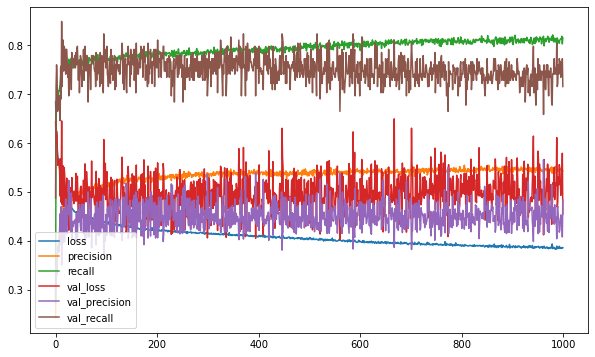

In [270]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [271]:
model.evaluate(X_test, y_test, verbose=0, return_dict=True)

{'loss': 0.4517863094806671,
 'precision': 0.4990476071834564,
 'recall': 0.6437346339225769}

In [272]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 608us/step
[[1330  263]
 [ 145  262]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1593
           1       0.50      0.64      0.56       407

    accuracy                           0.80      2000
   macro avg       0.70      0.74      0.71      2000
weighted avg       0.82      0.80      0.80      2000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [77]:
from tensorflow.keras.optimizers import Adam

In [274]:
# Learning Rate = 0.005
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Precision","Recall"] )
model.fit(x = X_train, y = y_train, validation_split = 0.1, 
          batch_size = 64, epochs = 500, verbose=1, class_weight=sklearn_weights)

Epoch 1/500
113/113 [==============================] - 1s 2ms/step - loss: 0.6617 - precision: 0.3668 - recall: 0.5014 - val_loss: 0.5441 - val_precision: 0.3870 - val_recall: 0.5633
Epoch 2/500
113/113 [==============================] - 0s 1ms/step - loss: 0.6217 - precision: 0.3594 - recall: 0.6766 - val_loss: 0.5001 - val_precision: 0.4387 - val_recall: 0.5886
Epoch 3/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5856 - precision: 0.3934 - recall: 0.7011 - val_loss: 0.4786 - val_precision: 0.4408 - val_recall: 0.6835
Epoch 4/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5465 - precision: 0.4195 - recall: 0.7412 - val_loss: 0.4830 - val_precision: 0.4424 - val_recall: 0.7532
Epoch 5/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5154 - precision: 0.4396 - recall: 0.7711 - val_loss: 0.4778 - val_precision: 0.4407 - val_recall: 0.7532
Epoch 6/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5054 - p

113/113 [==============================] - 0s 1ms/step - loss: 0.4380 - precision: 0.5196 - recall: 0.7731 - val_loss: 0.4645 - val_precision: 0.4479 - val_recall: 0.7342
Epoch 46/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4415 - precision: 0.5110 - recall: 0.7731 - val_loss: 0.4608 - val_precision: 0.4496 - val_recall: 0.7342
Epoch 47/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4393 - precision: 0.5077 - recall: 0.7792 - val_loss: 0.5302 - val_precision: 0.3960 - val_recall: 0.7595
Epoch 48/500
113/113 [==============================] - 0s 2ms/step - loss: 0.4427 - precision: 0.5141 - recall: 0.7779 - val_loss: 0.4666 - val_precision: 0.4506 - val_recall: 0.7215
Epoch 49/500
113/113 [==============================] - 0s 2ms/step - loss: 0.4392 - precision: 0.5112 - recall: 0.7765 - val_loss: 0.4597 - val_precision: 0.4575 - val_recall: 0.7152
Epoch 50/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4411 - precisio

113/113 [==============================] - 0s 1ms/step - loss: 0.4277 - precision: 0.5244 - recall: 0.7874 - val_loss: 0.4976 - val_precision: 0.4255 - val_recall: 0.7595
Epoch 90/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4274 - precision: 0.5231 - recall: 0.7833 - val_loss: 0.4970 - val_precision: 0.4281 - val_recall: 0.7532
Epoch 91/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4277 - precision: 0.5270 - recall: 0.7880 - val_loss: 0.4680 - val_precision: 0.4585 - val_recall: 0.7342
Epoch 92/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4271 - precision: 0.5227 - recall: 0.7901 - val_loss: 0.4823 - val_precision: 0.4514 - val_recall: 0.7342
Epoch 93/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4240 - precision: 0.5285 - recall: 0.7812 - val_loss: 0.4995 - val_precision: 0.4235 - val_recall: 0.7532
Epoch 94/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4305 - precisio

113/113 [==============================] - 0s 1ms/step - loss: 0.4218 - precision: 0.5269 - recall: 0.7982 - val_loss: 0.5447 - val_precision: 0.4125 - val_recall: 0.7911
Epoch 134/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4197 - precision: 0.5223 - recall: 0.7942 - val_loss: 0.4488 - val_precision: 0.4873 - val_recall: 0.7278
Epoch 135/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4223 - precision: 0.5278 - recall: 0.7880 - val_loss: 0.5124 - val_precision: 0.4306 - val_recall: 0.7658
Epoch 136/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4217 - precision: 0.5239 - recall: 0.7901 - val_loss: 0.4532 - val_precision: 0.4752 - val_recall: 0.7278
Epoch 137/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4245 - precision: 0.5235 - recall: 0.7935 - val_loss: 0.5046 - val_precision: 0.4343 - val_recall: 0.7532
Epoch 138/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4175 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4156 - precision: 0.5309 - recall: 0.7874 - val_loss: 0.4912 - val_precision: 0.4524 - val_recall: 0.7215
Epoch 178/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4178 - precision: 0.5254 - recall: 0.7860 - val_loss: 0.4845 - val_precision: 0.4492 - val_recall: 0.7278
Epoch 179/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4141 - precision: 0.5328 - recall: 0.7942 - val_loss: 0.4907 - val_precision: 0.4366 - val_recall: 0.7405
Epoch 180/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4146 - precision: 0.5210 - recall: 0.7935 - val_loss: 0.4553 - val_precision: 0.4653 - val_recall: 0.7215
Epoch 181/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4166 - precision: 0.5281 - recall: 0.7921 - val_loss: 0.4910 - val_precision: 0.4567 - val_recall: 0.7342
Epoch 182/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4156 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4133 - precision: 0.5273 - recall: 0.8003 - val_loss: 0.4914 - val_precision: 0.4521 - val_recall: 0.7468
Epoch 222/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4097 - precision: 0.5274 - recall: 0.7969 - val_loss: 0.5105 - val_precision: 0.4440 - val_recall: 0.7532
Epoch 223/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4136 - precision: 0.5332 - recall: 0.8023 - val_loss: 0.4908 - val_precision: 0.4520 - val_recall: 0.7152
Epoch 224/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4082 - precision: 0.5350 - recall: 0.8057 - val_loss: 0.5296 - val_precision: 0.4255 - val_recall: 0.7595
Epoch 225/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4128 - precision: 0.5254 - recall: 0.8023 - val_loss: 0.4780 - val_precision: 0.4590 - val_recall: 0.7089
Epoch 226/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4120 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4076 - precision: 0.5357 - recall: 0.8003 - val_loss: 0.4513 - val_precision: 0.4829 - val_recall: 0.7152
Epoch 266/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4067 - precision: 0.5288 - recall: 0.7982 - val_loss: 0.5372 - val_precision: 0.4265 - val_recall: 0.7532
Epoch 267/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4087 - precision: 0.5338 - recall: 0.8003 - val_loss: 0.5262 - val_precision: 0.4321 - val_recall: 0.7658
Epoch 268/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4095 - precision: 0.5286 - recall: 0.8043 - val_loss: 0.5370 - val_precision: 0.4172 - val_recall: 0.7658
Epoch 269/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4083 - precision: 0.5324 - recall: 0.8091 - val_loss: 0.4576 - val_precision: 0.5000 - val_recall: 0.7089
Epoch 270/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4076 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4045 - precision: 0.5323 - recall: 0.7996 - val_loss: 0.5389 - val_precision: 0.4201 - val_recall: 0.7658
Epoch 310/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4059 - precision: 0.5312 - recall: 0.8050 - val_loss: 0.4899 - val_precision: 0.4711 - val_recall: 0.7215
Epoch 311/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4061 - precision: 0.5335 - recall: 0.8003 - val_loss: 0.4515 - val_precision: 0.4871 - val_recall: 0.7152
Epoch 312/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4105 - precision: 0.5245 - recall: 0.8071 - val_loss: 0.5475 - val_precision: 0.4236 - val_recall: 0.7722
Epoch 313/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4085 - precision: 0.5297 - recall: 0.8125 - val_loss: 0.5047 - val_precision: 0.4483 - val_recall: 0.7405
Epoch 314/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4059 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4005 - precision: 0.5385 - recall: 0.8071 - val_loss: 0.5284 - val_precision: 0.4291 - val_recall: 0.7468
Epoch 354/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4049 - precision: 0.5372 - recall: 0.8139 - val_loss: 0.4797 - val_precision: 0.4741 - val_recall: 0.7532
Epoch 355/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4018 - precision: 0.5375 - recall: 0.8084 - val_loss: 0.5215 - val_precision: 0.4391 - val_recall: 0.7532
Epoch 356/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4011 - precision: 0.5297 - recall: 0.8111 - val_loss: 0.5057 - val_precision: 0.4504 - val_recall: 0.7468
Epoch 357/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4077 - precision: 0.5285 - recall: 0.8057 - val_loss: 0.5226 - val_precision: 0.4387 - val_recall: 0.7468
Epoch 358/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4038 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4022 - precision: 0.5325 - recall: 0.8064 - val_loss: 0.5188 - val_precision: 0.4254 - val_recall: 0.7215
Epoch 398/500
113/113 [==============================] - 0s 1ms/step - loss: 0.3995 - precision: 0.5344 - recall: 0.8064 - val_loss: 0.4901 - val_precision: 0.4570 - val_recall: 0.7405
Epoch 399/500
113/113 [==============================] - 0s 1ms/step - loss: 0.3991 - precision: 0.5379 - recall: 0.8186 - val_loss: 0.5157 - val_precision: 0.4380 - val_recall: 0.7595
Epoch 400/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4022 - precision: 0.5294 - recall: 0.8125 - val_loss: 0.5767 - val_precision: 0.3987 - val_recall: 0.7975
Epoch 401/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4044 - precision: 0.5297 - recall: 0.8125 - val_loss: 0.4537 - val_precision: 0.5068 - val_recall: 0.7089
Epoch 402/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4020 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4046 - precision: 0.5211 - recall: 0.8139 - val_loss: 0.4768 - val_precision: 0.4583 - val_recall: 0.6962
Epoch 442/500
113/113 [==============================] - 0s 1ms/step - loss: 0.3994 - precision: 0.5356 - recall: 0.8077 - val_loss: 0.5431 - val_precision: 0.4240 - val_recall: 0.7595
Epoch 443/500
113/113 [==============================] - 0s 1ms/step - loss: 0.3956 - precision: 0.5367 - recall: 0.8105 - val_loss: 0.5657 - val_precision: 0.4116 - val_recall: 0.7658
Epoch 444/500
113/113 [==============================] - 0s 1ms/step - loss: 0.3969 - precision: 0.5348 - recall: 0.8139 - val_loss: 0.5443 - val_precision: 0.4149 - val_recall: 0.7405
Epoch 445/500
113/113 [==============================] - 0s 1ms/step - loss: 0.3964 - precision: 0.5291 - recall: 0.8152 - val_loss: 0.5214 - val_precision: 0.4577 - val_recall: 0.7532
Epoch 446/500
113/113 [==============================] - 0s 1ms/step - loss: 0.3984 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.3967 - precision: 0.5301 - recall: 0.8084 - val_loss: 0.5521 - val_precision: 0.4170 - val_recall: 0.7468
Epoch 486/500
113/113 [==============================] - 0s 1ms/step - loss: 0.3954 - precision: 0.5345 - recall: 0.8166 - val_loss: 0.4920 - val_precision: 0.4571 - val_recall: 0.7089
Epoch 487/500
113/113 [==============================] - 0s 1ms/step - loss: 0.3984 - precision: 0.5302 - recall: 0.8057 - val_loss: 0.5280 - val_precision: 0.4235 - val_recall: 0.7532
Epoch 488/500
113/113 [==============================] - 0s 1ms/step - loss: 0.3972 - precision: 0.5320 - recall: 0.8132 - val_loss: 0.5409 - val_precision: 0.4348 - val_recall: 0.7595
Epoch 489/500
113/113 [==============================] - 0s 1ms/step - loss: 0.3972 - precision: 0.5320 - recall: 0.8132 - val_loss: 0.5209 - val_precision: 0.4492 - val_recall: 0.7278
Epoch 490/500
113/113 [==============================] - 0s 1ms/step - loss: 0.3971 - pre

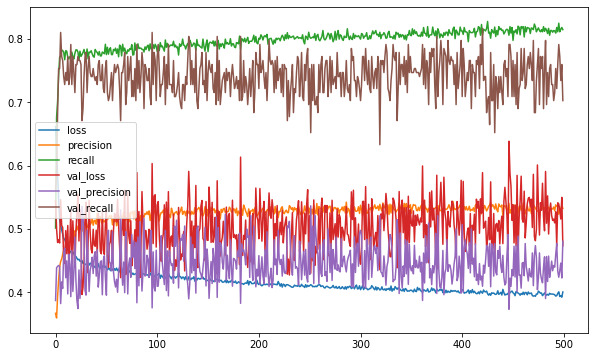

In [275]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [276]:
model.evaluate(X_test, y_test, verbose=0, return_dict=True)

{'loss': 0.44641610980033875,
 'precision': 0.49500998854637146,
 'recall': 0.6093366146087646}

In [277]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 608us/step
[[1340  253]
 [ 159  248]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1593
           1       0.50      0.61      0.55       407

    accuracy                           0.79      2000
   macro avg       0.69      0.73      0.71      2000
weighted avg       0.81      0.79      0.80      2000



In [282]:
# Learning Rate = 0.03
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate = 0.03)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Precision","Recall"] )
model.fit(x = X_train, y = y_train, validation_split = 0.1, 
          batch_size = 64, epochs = 500, verbose=1, class_weight=sklearn_weights)

Epoch 1/500
113/113 [==============================] - 1s 2ms/step - loss: 0.6176 - precision: 0.3448 - recall: 0.6413 - val_loss: 0.5686 - val_precision: 0.3631 - val_recall: 0.7468
Epoch 2/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5366 - precision: 0.4115 - recall: 0.7656 - val_loss: 0.4900 - val_precision: 0.4667 - val_recall: 0.7532
Epoch 3/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5107 - precision: 0.4426 - recall: 0.7459 - val_loss: 0.4519 - val_precision: 0.4752 - val_recall: 0.7278
Epoch 4/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4997 - precision: 0.4556 - recall: 0.7357 - val_loss: 0.5347 - val_precision: 0.3837 - val_recall: 0.8038
Epoch 5/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4864 - precision: 0.4554 - recall: 0.7554 - val_loss: 0.4758 - val_precision: 0.4246 - val_recall: 0.7658
Epoch 6/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4864 - p

113/113 [==============================] - 0s 1ms/step - loss: 0.4564 - precision: 0.4836 - recall: 0.7595 - val_loss: 0.4772 - val_precision: 0.4440 - val_recall: 0.7532
Epoch 46/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4578 - precision: 0.4644 - recall: 0.7745 - val_loss: 0.5507 - val_precision: 0.3899 - val_recall: 0.8291
Epoch 47/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4627 - precision: 0.4791 - recall: 0.7636 - val_loss: 0.5733 - val_precision: 0.3846 - val_recall: 0.8228
Epoch 48/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4577 - precision: 0.4861 - recall: 0.7711 - val_loss: 0.5406 - val_precision: 0.4040 - val_recall: 0.7722
Epoch 49/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4574 - precision: 0.4850 - recall: 0.7595 - val_loss: 0.4692 - val_precision: 0.4528 - val_recall: 0.7595
Epoch 50/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4565 - precisio

113/113 [==============================] - 0s 1ms/step - loss: 0.4503 - precision: 0.4958 - recall: 0.7622 - val_loss: 0.4695 - val_precision: 0.4795 - val_recall: 0.7405
Epoch 90/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4541 - precision: 0.5032 - recall: 0.7459 - val_loss: 0.5278 - val_precision: 0.4296 - val_recall: 0.7532
Epoch 91/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4602 - precision: 0.4956 - recall: 0.7575 - val_loss: 0.4510 - val_precision: 0.4833 - val_recall: 0.7342
Epoch 92/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4522 - precision: 0.5059 - recall: 0.7541 - val_loss: 0.5041 - val_precision: 0.4192 - val_recall: 0.7722
Epoch 93/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4560 - precision: 0.4895 - recall: 0.7622 - val_loss: 0.4828 - val_precision: 0.4630 - val_recall: 0.7532
Epoch 94/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4540 - precisio

113/113 [==============================] - 0s 1ms/step - loss: 0.4494 - precision: 0.4839 - recall: 0.7779 - val_loss: 0.5370 - val_precision: 0.4424 - val_recall: 0.7785
Epoch 134/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4489 - precision: 0.4991 - recall: 0.7588 - val_loss: 0.4407 - val_precision: 0.5000 - val_recall: 0.7405
Epoch 135/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4589 - precision: 0.4938 - recall: 0.7575 - val_loss: 0.5256 - val_precision: 0.4409 - val_recall: 0.7785
Epoch 136/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4473 - precision: 0.5022 - recall: 0.7649 - val_loss: 0.4865 - val_precision: 0.4642 - val_recall: 0.7785
Epoch 137/500
113/113 [==============================] - 0s 2ms/step - loss: 0.4485 - precision: 0.5079 - recall: 0.7629 - val_loss: 0.4670 - val_precision: 0.4803 - val_recall: 0.7722
Epoch 138/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4481 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4478 - precision: 0.4891 - recall: 0.7799 - val_loss: 0.4907 - val_precision: 0.4590 - val_recall: 0.7785
Epoch 178/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4456 - precision: 0.4956 - recall: 0.7656 - val_loss: 0.4621 - val_precision: 0.4713 - val_recall: 0.7278
Epoch 179/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4449 - precision: 0.4916 - recall: 0.7779 - val_loss: 0.4437 - val_precision: 0.5022 - val_recall: 0.7342
Epoch 180/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4465 - precision: 0.4928 - recall: 0.7697 - val_loss: 0.4304 - val_precision: 0.5133 - val_recall: 0.7342
Epoch 181/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4486 - precision: 0.4877 - recall: 0.7670 - val_loss: 0.4968 - val_precision: 0.4529 - val_recall: 0.7911
Epoch 182/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4442 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4444 - precision: 0.5045 - recall: 0.7649 - val_loss: 0.4805 - val_precision: 0.4545 - val_recall: 0.7911
Epoch 222/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4444 - precision: 0.4911 - recall: 0.7683 - val_loss: 0.5586 - val_precision: 0.4238 - val_recall: 0.8101
Epoch 223/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4427 - precision: 0.4976 - recall: 0.7765 - val_loss: 0.4975 - val_precision: 0.4621 - val_recall: 0.7722
Epoch 224/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4433 - precision: 0.5004 - recall: 0.7690 - val_loss: 0.4918 - val_precision: 0.4654 - val_recall: 0.7658
Epoch 225/500
113/113 [==============================] - 0s 2ms/step - loss: 0.4441 - precision: 0.5000 - recall: 0.7697 - val_loss: 0.4509 - val_precision: 0.4897 - val_recall: 0.7532
Epoch 226/500
113/113 [==============================] - 0s 2ms/step - loss: 0.4413 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4437 - precision: 0.5038 - recall: 0.7643 - val_loss: 0.4882 - val_precision: 0.4562 - val_recall: 0.7911
Epoch 266/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4421 - precision: 0.5002 - recall: 0.7663 - val_loss: 0.4940 - val_precision: 0.4437 - val_recall: 0.7975
Epoch 267/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4482 - precision: 0.4899 - recall: 0.7717 - val_loss: 0.5006 - val_precision: 0.4296 - val_recall: 0.7911
Epoch 268/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4410 - precision: 0.4914 - recall: 0.7731 - val_loss: 0.5490 - val_precision: 0.4025 - val_recall: 0.8101
Epoch 269/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4417 - precision: 0.4807 - recall: 0.7880 - val_loss: 0.4369 - val_precision: 0.4979 - val_recall: 0.7405
Epoch 270/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4495 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4458 - precision: 0.4950 - recall: 0.7663 - val_loss: 0.5106 - val_precision: 0.4414 - val_recall: 0.8101
Epoch 310/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4415 - precision: 0.4871 - recall: 0.7799 - val_loss: 0.5008 - val_precision: 0.4568 - val_recall: 0.8038
Epoch 311/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4439 - precision: 0.4974 - recall: 0.7731 - val_loss: 0.5098 - val_precision: 0.4472 - val_recall: 0.8038
Epoch 312/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4471 - precision: 0.4917 - recall: 0.7622 - val_loss: 0.5880 - val_precision: 0.4082 - val_recall: 0.8165
Epoch 313/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4444 - precision: 0.4931 - recall: 0.7779 - val_loss: 0.5336 - val_precision: 0.4205 - val_recall: 0.8038
Epoch 314/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4412 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4425 - precision: 0.4924 - recall: 0.7690 - val_loss: 0.5172 - val_precision: 0.4224 - val_recall: 0.8101
Epoch 354/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4451 - precision: 0.5022 - recall: 0.7656 - val_loss: 0.4716 - val_precision: 0.4683 - val_recall: 0.7468
Epoch 355/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4434 - precision: 0.4933 - recall: 0.7704 - val_loss: 0.4508 - val_precision: 0.4877 - val_recall: 0.7532
Epoch 356/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4400 - precision: 0.4938 - recall: 0.7806 - val_loss: 0.4783 - val_precision: 0.4710 - val_recall: 0.7722
Epoch 357/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4414 - precision: 0.4998 - recall: 0.7724 - val_loss: 0.4881 - val_precision: 0.4480 - val_recall: 0.7911
Epoch 358/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4418 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4398 - precision: 0.4912 - recall: 0.7731 - val_loss: 0.4586 - val_precision: 0.4781 - val_recall: 0.7595
Epoch 398/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4382 - precision: 0.4922 - recall: 0.7765 - val_loss: 0.4718 - val_precision: 0.4747 - val_recall: 0.7722
Epoch 399/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4411 - precision: 0.4967 - recall: 0.7758 - val_loss: 0.5260 - val_precision: 0.4320 - val_recall: 0.8038
Epoch 400/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4421 - precision: 0.5076 - recall: 0.7677 - val_loss: 0.5166 - val_precision: 0.4325 - val_recall: 0.7911
Epoch 401/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4414 - precision: 0.4963 - recall: 0.7670 - val_loss: 0.4737 - val_precision: 0.4481 - val_recall: 0.7658
Epoch 402/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4452 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4404 - precision: 0.4948 - recall: 0.7826 - val_loss: 0.4674 - val_precision: 0.4815 - val_recall: 0.7405
Epoch 442/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4460 - precision: 0.5073 - recall: 0.7602 - val_loss: 0.5175 - val_precision: 0.4452 - val_recall: 0.7975
Epoch 443/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4412 - precision: 0.5015 - recall: 0.7697 - val_loss: 0.5473 - val_precision: 0.4224 - val_recall: 0.8101
Epoch 444/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4396 - precision: 0.4965 - recall: 0.7717 - val_loss: 0.5127 - val_precision: 0.4330 - val_recall: 0.7975
Epoch 445/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4406 - precision: 0.5047 - recall: 0.7670 - val_loss: 0.5305 - val_precision: 0.4295 - val_recall: 0.8101
Epoch 446/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4391 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4412 - precision: 0.4883 - recall: 0.7649 - val_loss: 0.5004 - val_precision: 0.4493 - val_recall: 0.7848
Epoch 486/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4454 - precision: 0.5095 - recall: 0.7677 - val_loss: 0.4715 - val_precision: 0.4708 - val_recall: 0.7658
Epoch 487/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4430 - precision: 0.4974 - recall: 0.7677 - val_loss: 0.4633 - val_precision: 0.4857 - val_recall: 0.7532
Epoch 488/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4406 - precision: 0.5031 - recall: 0.7663 - val_loss: 0.4605 - val_precision: 0.4747 - val_recall: 0.7722
Epoch 489/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4395 - precision: 0.4904 - recall: 0.7833 - val_loss: 0.4700 - val_precision: 0.4713 - val_recall: 0.7785
Epoch 490/500
113/113 [==============================] - 0s 1ms/step - loss: 0.4386 - pre

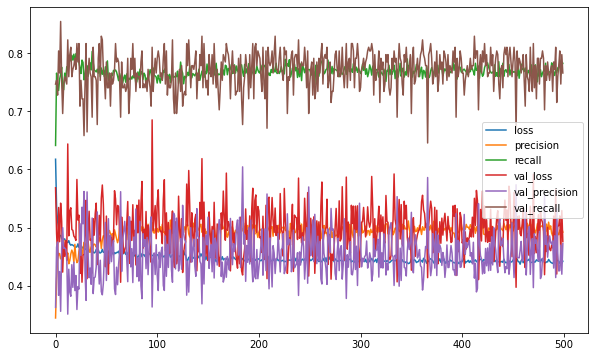

In [283]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [284]:
model.evaluate(X_test, y_test, verbose=0, return_dict=True)

{'loss': 0.47283536195755005,
 'precision': 0.4569105803966522,
 'recall': 0.6904177069664001}

In [285]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 613us/step
[[1259  334]
 [ 126  281]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1593
           1       0.46      0.69      0.55       407

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.70      2000
weighted avg       0.82      0.77      0.79      2000



### Add Dropout Layer

In [97]:
from tensorflow.keras.layers import Dropout

In [287]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Precision","Recall"] )
model.fit(x = X_train, y = y_train, validation_split = 0.1, 
          batch_size = 64, epochs = 500, verbose=1, class_weight=sklearn_weights)

Epoch 1/300
113/113 [==============================] - 1s 2ms/step - loss: 0.6814 - precision: 0.2386 - recall: 0.6807 - val_loss: 0.6806 - val_precision: 0.3451 - val_recall: 0.6203
Epoch 2/300
113/113 [==============================] - 0s 1ms/step - loss: 0.6555 - precision: 0.3297 - recall: 0.5272 - val_loss: 0.6379 - val_precision: 0.3516 - val_recall: 0.6899
Epoch 3/300
113/113 [==============================] - 0s 1ms/step - loss: 0.6232 - precision: 0.3503 - recall: 0.6039 - val_loss: 0.6107 - val_precision: 0.3538 - val_recall: 0.7278
Epoch 4/300
113/113 [==============================] - 0s 1ms/step - loss: 0.5933 - precision: 0.3862 - recall: 0.6365 - val_loss: 0.6017 - val_precision: 0.3812 - val_recall: 0.8228
Epoch 5/300
113/113 [==============================] - 0s 1ms/step - loss: 0.5659 - precision: 0.4165 - recall: 0.7079 - val_loss: 0.5317 - val_precision: 0.4416 - val_recall: 0.7658
Epoch 6/300
113/113 [==============================] - 0s 1ms/step - loss: 0.5529 - p

113/113 [==============================] - 0s 1ms/step - loss: 0.4987 - precision: 0.5041 - recall: 0.7031 - val_loss: 0.4622 - val_precision: 0.5133 - val_recall: 0.7342
Epoch 46/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4915 - precision: 0.5007 - recall: 0.7099 - val_loss: 0.4829 - val_precision: 0.4387 - val_recall: 0.7468
Epoch 47/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4926 - precision: 0.4861 - recall: 0.7255 - val_loss: 0.4379 - val_precision: 0.5539 - val_recall: 0.7152
Epoch 48/300
113/113 [==============================] - 0s 1ms/step - loss: 0.5025 - precision: 0.4878 - recall: 0.7052 - val_loss: 0.4535 - val_precision: 0.5067 - val_recall: 0.7152
Epoch 49/300
113/113 [==============================] - 0s 1ms/step - loss: 0.5013 - precision: 0.4811 - recall: 0.7276 - val_loss: 0.4718 - val_precision: 0.4622 - val_recall: 0.7342
Epoch 50/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4922 - precisio

113/113 [==============================] - 0s 1ms/step - loss: 0.4940 - precision: 0.4962 - recall: 0.7004 - val_loss: 0.4759 - val_precision: 0.4686 - val_recall: 0.7089
Epoch 90/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4814 - precision: 0.5031 - recall: 0.7215 - val_loss: 0.4781 - val_precision: 0.4597 - val_recall: 0.7215
Epoch 91/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4944 - precision: 0.4998 - recall: 0.7106 - val_loss: 0.4777 - val_precision: 0.4956 - val_recall: 0.7152
Epoch 92/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4891 - precision: 0.4844 - recall: 0.7174 - val_loss: 0.4676 - val_precision: 0.4832 - val_recall: 0.7278
Epoch 93/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4883 - precision: 0.5036 - recall: 0.7052 - val_loss: 0.4994 - val_precision: 0.4261 - val_recall: 0.7658
Epoch 94/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4943 - precisio

113/113 [==============================] - 0s 1ms/step - loss: 0.4894 - precision: 0.5073 - recall: 0.7106 - val_loss: 0.4587 - val_precision: 0.5112 - val_recall: 0.7215
Epoch 134/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4777 - precision: 0.4991 - recall: 0.7167 - val_loss: 0.4912 - val_precision: 0.4603 - val_recall: 0.7342
Epoch 135/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4872 - precision: 0.5093 - recall: 0.7065 - val_loss: 0.4727 - val_precision: 0.4774 - val_recall: 0.7342
Epoch 136/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4835 - precision: 0.5188 - recall: 0.7106 - val_loss: 0.4614 - val_precision: 0.5045 - val_recall: 0.7025
Epoch 137/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4805 - precision: 0.5249 - recall: 0.7086 - val_loss: 0.4863 - val_precision: 0.4815 - val_recall: 0.7405
Epoch 138/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4841 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4849 - precision: 0.4993 - recall: 0.7099 - val_loss: 0.4748 - val_precision: 0.5225 - val_recall: 0.7342
Epoch 178/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4819 - precision: 0.5182 - recall: 0.7065 - val_loss: 0.4631 - val_precision: 0.5160 - val_recall: 0.7152
Epoch 179/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4818 - precision: 0.5101 - recall: 0.7004 - val_loss: 0.4660 - val_precision: 0.4933 - val_recall: 0.7025
Epoch 180/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4886 - precision: 0.4829 - recall: 0.7113 - val_loss: 0.4552 - val_precision: 0.4937 - val_recall: 0.7405
Epoch 181/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4787 - precision: 0.4953 - recall: 0.7235 - val_loss: 0.4834 - val_precision: 0.4473 - val_recall: 0.7785
Epoch 182/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4868 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4778 - precision: 0.5018 - recall: 0.7391 - val_loss: 0.4734 - val_precision: 0.4915 - val_recall: 0.7342
Epoch 222/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4818 - precision: 0.5097 - recall: 0.7174 - val_loss: 0.4796 - val_precision: 0.4704 - val_recall: 0.7532
Epoch 223/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4806 - precision: 0.5095 - recall: 0.7262 - val_loss: 0.5195 - val_precision: 0.4457 - val_recall: 0.7785
Epoch 224/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4782 - precision: 0.5104 - recall: 0.7303 - val_loss: 0.5127 - val_precision: 0.4368 - val_recall: 0.7658
Epoch 225/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4855 - precision: 0.4947 - recall: 0.7296 - val_loss: 0.4650 - val_precision: 0.5179 - val_recall: 0.7342
Epoch 226/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4806 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4836 - precision: 0.5226 - recall: 0.7133 - val_loss: 0.4517 - val_precision: 0.5136 - val_recall: 0.7152
Epoch 266/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4814 - precision: 0.5048 - recall: 0.7092 - val_loss: 0.4670 - val_precision: 0.5000 - val_recall: 0.7278
Epoch 267/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4759 - precision: 0.5152 - recall: 0.7160 - val_loss: 0.5178 - val_precision: 0.4502 - val_recall: 0.7722
Epoch 268/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4807 - precision: 0.5157 - recall: 0.7147 - val_loss: 0.4626 - val_precision: 0.5139 - val_recall: 0.7025
Epoch 269/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4819 - precision: 0.5079 - recall: 0.7242 - val_loss: 0.4816 - val_precision: 0.4878 - val_recall: 0.7595
Epoch 270/300
113/113 [==============================] - 0s 2ms/step - loss: 0.4775 - pre

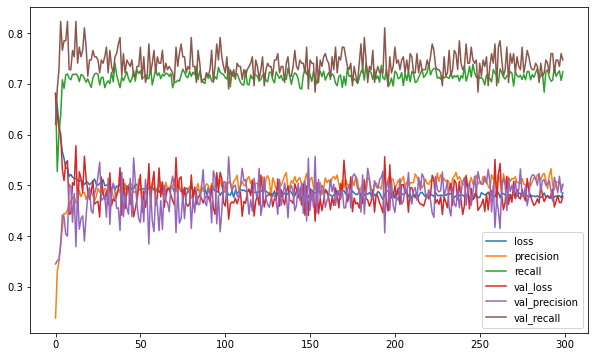

In [288]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [289]:
model.evaluate(X_test, y_test, verbose=0, return_dict=True)

{'loss': 0.4779872000217438,
 'precision': 0.4929077923297882,
 'recall': 0.6830466985702515}

In [290]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 591us/step
[[1307  286]
 [ 129  278]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1593
           1       0.49      0.68      0.57       407

    accuracy                           0.79      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.83      0.79      0.80      2000



In [300]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
# model.add(Dropout(0.3))
model.add(Dense(5, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Precision","Recall"] )
model.fit(x = X_train, y = y_train, validation_split = 0.1, 
          batch_size = 64, epochs = 300, verbose=1, class_weight=sklearn_weights)

Epoch 1/300
113/113 [==============================] - 1s 2ms/step - loss: 0.6655 - precision: 0.2788 - recall: 0.6569 - val_loss: 0.6349 - val_precision: 0.3884 - val_recall: 0.5949
Epoch 2/300
113/113 [==============================] - 0s 1ms/step - loss: 0.6170 - precision: 0.3631 - recall: 0.6427 - val_loss: 0.5774 - val_precision: 0.4191 - val_recall: 0.7215
Epoch 3/300
113/113 [==============================] - 0s 1ms/step - loss: 0.5749 - precision: 0.4016 - recall: 0.6753 - val_loss: 0.5238 - val_precision: 0.4453 - val_recall: 0.7468
Epoch 4/300
113/113 [==============================] - 0s 1ms/step - loss: 0.5445 - precision: 0.4277 - recall: 0.6916 - val_loss: 0.5428 - val_precision: 0.4175 - val_recall: 0.7848
Epoch 5/300
113/113 [==============================] - 0s 1ms/step - loss: 0.5223 - precision: 0.4462 - recall: 0.7208 - val_loss: 0.4884 - val_precision: 0.4549 - val_recall: 0.7342
Epoch 6/300
113/113 [==============================] - 0s 1ms/step - loss: 0.5138 - p

113/113 [==============================] - 0s 1ms/step - loss: 0.4688 - precision: 0.4820 - recall: 0.7541 - val_loss: 0.4425 - val_precision: 0.5022 - val_recall: 0.7278
Epoch 46/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4782 - precision: 0.4832 - recall: 0.7609 - val_loss: 0.4665 - val_precision: 0.4449 - val_recall: 0.7405
Epoch 47/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4709 - precision: 0.4811 - recall: 0.7344 - val_loss: 0.4615 - val_precision: 0.4659 - val_recall: 0.7342
Epoch 48/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4774 - precision: 0.4890 - recall: 0.7541 - val_loss: 0.4579 - val_precision: 0.5187 - val_recall: 0.7025
Epoch 49/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4692 - precision: 0.4918 - recall: 0.7514 - val_loss: 0.4495 - val_precision: 0.4871 - val_recall: 0.7152
Epoch 50/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4721 - precisio

113/113 [==============================] - 0s 1ms/step - loss: 0.4626 - precision: 0.5002 - recall: 0.7541 - val_loss: 0.4511 - val_precision: 0.5092 - val_recall: 0.7025
Epoch 90/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4689 - precision: 0.5049 - recall: 0.7391 - val_loss: 0.4442 - val_precision: 0.4934 - val_recall: 0.7089
Epoch 91/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4644 - precision: 0.4931 - recall: 0.7493 - val_loss: 0.4548 - val_precision: 0.4563 - val_recall: 0.7278
Epoch 92/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4654 - precision: 0.4926 - recall: 0.7649 - val_loss: 0.4597 - val_precision: 0.4574 - val_recall: 0.7468
Epoch 93/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4651 - precision: 0.4958 - recall: 0.7643 - val_loss: 0.4771 - val_precision: 0.4234 - val_recall: 0.7342
Epoch 94/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4602 - precisio

113/113 [==============================] - 0s 1ms/step - loss: 0.4616 - precision: 0.4932 - recall: 0.7663 - val_loss: 0.4597 - val_precision: 0.4846 - val_recall: 0.6962
Epoch 134/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4581 - precision: 0.4948 - recall: 0.7500 - val_loss: 0.4686 - val_precision: 0.4323 - val_recall: 0.7278
Epoch 135/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4605 - precision: 0.4968 - recall: 0.7466 - val_loss: 0.4461 - val_precision: 0.4868 - val_recall: 0.7025
Epoch 136/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4625 - precision: 0.5009 - recall: 0.7398 - val_loss: 0.4446 - val_precision: 0.5556 - val_recall: 0.6962
Epoch 137/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4605 - precision: 0.5113 - recall: 0.7527 - val_loss: 0.4999 - val_precision: 0.4211 - val_recall: 0.7595
Epoch 138/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4562 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4574 - precision: 0.4971 - recall: 0.7527 - val_loss: 0.4532 - val_precision: 0.4835 - val_recall: 0.7405
Epoch 178/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4580 - precision: 0.4891 - recall: 0.7615 - val_loss: 0.4209 - val_precision: 0.5579 - val_recall: 0.6709
Epoch 179/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4491 - precision: 0.5137 - recall: 0.7643 - val_loss: 0.4409 - val_precision: 0.5000 - val_recall: 0.6962
Epoch 180/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4561 - precision: 0.5091 - recall: 0.7588 - val_loss: 0.4489 - val_precision: 0.4872 - val_recall: 0.7215
Epoch 181/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4519 - precision: 0.5055 - recall: 0.7507 - val_loss: 0.4405 - val_precision: 0.5045 - val_recall: 0.7089
Epoch 182/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4544 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4574 - precision: 0.5087 - recall: 0.7534 - val_loss: 0.4621 - val_precision: 0.4851 - val_recall: 0.7215
Epoch 222/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4565 - precision: 0.5041 - recall: 0.7548 - val_loss: 0.4453 - val_precision: 0.5045 - val_recall: 0.7089
Epoch 223/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4560 - precision: 0.5073 - recall: 0.7588 - val_loss: 0.4845 - val_precision: 0.4444 - val_recall: 0.7342
Epoch 224/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4499 - precision: 0.5009 - recall: 0.7534 - val_loss: 0.4829 - val_precision: 0.4440 - val_recall: 0.7532
Epoch 225/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4541 - precision: 0.4973 - recall: 0.7595 - val_loss: 0.4542 - val_precision: 0.5045 - val_recall: 0.7089
Epoch 226/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4529 - pre

113/113 [==============================] - 0s 1ms/step - loss: 0.4535 - precision: 0.5112 - recall: 0.7602 - val_loss: 0.4394 - val_precision: 0.5115 - val_recall: 0.7025
Epoch 266/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4551 - precision: 0.5068 - recall: 0.7561 - val_loss: 0.4202 - val_precision: 0.5347 - val_recall: 0.6835
Epoch 267/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4558 - precision: 0.5093 - recall: 0.7588 - val_loss: 0.4866 - val_precision: 0.4424 - val_recall: 0.7532
Epoch 268/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4555 - precision: 0.4978 - recall: 0.7656 - val_loss: 0.4424 - val_precision: 0.4888 - val_recall: 0.6899
Epoch 269/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4601 - precision: 0.4947 - recall: 0.7663 - val_loss: 0.4614 - val_precision: 0.4728 - val_recall: 0.7152
Epoch 270/300
113/113 [==============================] - 0s 1ms/step - loss: 0.4471 - pre

In [301]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 618us/step
[[1341  252]
 [ 147  260]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1593
           1       0.51      0.64      0.57       407

    accuracy                           0.80      2000
   macro avg       0.70      0.74      0.72      2000
weighted avg       0.82      0.80      0.81      2000



### Add Early Stop

In [291]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [307]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Precision","Recall"] )

early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 30, restore_best_weights = True)

model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, 
          epochs = 500, verbose=1, class_weight=sklearn_weights, callbacks = [early_stop])

Epoch 1/500
113/113 [==============================] - 2s 9ms/step - loss: 0.6654 - precision: 0.2703 - recall: 0.6338 - val_loss: 0.6049 - val_precision: 0.3542 - val_recall: 0.6456
Epoch 2/500
113/113 [==============================] - 0s 1ms/step - loss: 0.6362 - precision: 0.2959 - recall: 0.6576 - val_loss: 0.5955 - val_precision: 0.3607 - val_recall: 0.6962
Epoch 3/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5992 - precision: 0.3455 - recall: 0.6984 - val_loss: 0.5467 - val_precision: 0.4000 - val_recall: 0.7089
Epoch 4/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5714 - precision: 0.3887 - recall: 0.7120 - val_loss: 0.6061 - val_precision: 0.3505 - val_recall: 0.8165
Epoch 5/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5607 - precision: 0.3986 - recall: 0.7126 - val_loss: 0.5437 - val_precision: 0.4111 - val_recall: 0.7468
Epoch 6/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5433 - p

Epoch 44: early stopping


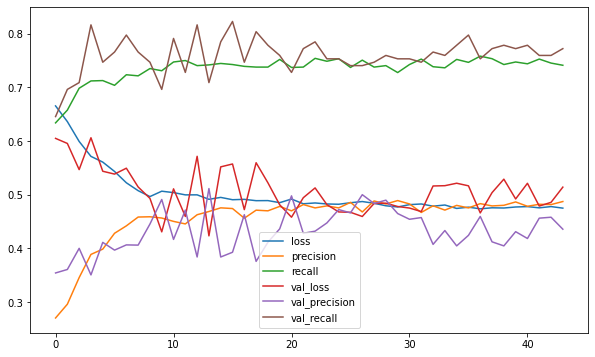

In [308]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [309]:
model.evaluate(X_test, y_test, verbose=0, return_dict=True)

{'loss': 0.4279392957687378,
 'precision': 0.5041493773460388,
 'recall': 0.5970516204833984}

In [310]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 588us/step
[[1354  239]
 [ 164  243]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1593
           1       0.50      0.60      0.55       407

    accuracy                           0.80      2000
   macro avg       0.70      0.72      0.71      2000
weighted avg       0.81      0.80      0.80      2000



In [409]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Precision","Recall"] )

early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, 
          epochs = 500, verbose=1, class_weight=sklearn_weights, callbacks = [early_stop])

Epoch 1/500
113/113 [==============================] - 1s 4ms/step - loss: 0.6782 - precision: 0.2387 - recall: 0.6855 - val_loss: 0.6285 - val_precision: 0.3403 - val_recall: 0.6203
Epoch 2/500
113/113 [==============================] - 0s 2ms/step - loss: 0.6412 - precision: 0.3266 - recall: 0.6304 - val_loss: 0.6046 - val_precision: 0.3397 - val_recall: 0.6772
Epoch 3/500
113/113 [==============================] - 0s 2ms/step - loss: 0.6185 - precision: 0.3420 - recall: 0.6515 - val_loss: 0.5748 - val_precision: 0.3741 - val_recall: 0.6962
Epoch 4/500
113/113 [==============================] - 0s 2ms/step - loss: 0.5980 - precision: 0.3583 - recall: 0.6868 - val_loss: 0.6170 - val_precision: 0.3442 - val_recall: 0.8038
Epoch 5/500
113/113 [==============================] - 0s 2ms/step - loss: 0.5714 - precision: 0.3835 - recall: 0.7147 - val_loss: 0.5250 - val_precision: 0.4323 - val_recall: 0.7278
Epoch 6/500
113/113 [==============================] - 0s 2ms/step - loss: 0.5393 - p

In [410]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# best score for "val_loss" at patience = 15

63/63 [==============================] - 0s 1ms/step
[[1322  271]
 [ 146  261]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1593
           1       0.49      0.64      0.56       407

    accuracy                           0.79      2000
   macro avg       0.70      0.74      0.71      2000
weighted avg       0.82      0.79      0.80      2000



63/63 [==============================] - 0s 1ms/step


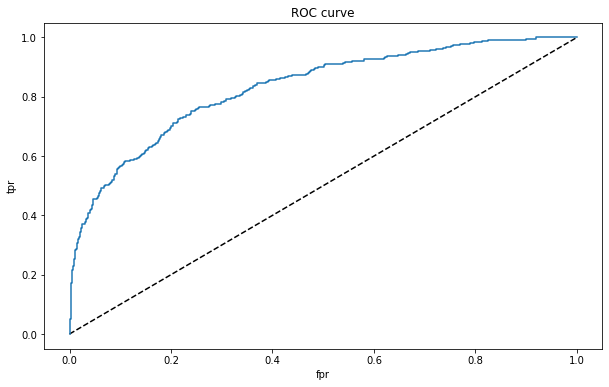

In [411]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [412]:
roc_auc_score(y_test, y_pred_proba)

0.8304298134806609

#### Monitor the "val_recall" as metric

In [311]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Precision","Recall"] )
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 30, restore_best_weights = True)

model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, 
          epochs = 500, verbose=1, class_weight=sklearn_weights, callbacks = [early_stop])

Epoch 1/500
113/113 [==============================] - 1s 2ms/step - loss: 0.6684 - precision: 0.2743 - recall: 0.6651 - val_loss: 0.6560 - val_precision: 0.3744 - val_recall: 0.5380
Epoch 2/500
113/113 [==============================] - 0s 1ms/step - loss: 0.6404 - precision: 0.3436 - recall: 0.5992 - val_loss: 0.6384 - val_precision: 0.3791 - val_recall: 0.6646
Epoch 3/500
113/113 [==============================] - 0s 1ms/step - loss: 0.6105 - precision: 0.3744 - recall: 0.6230 - val_loss: 0.5874 - val_precision: 0.4256 - val_recall: 0.6519
Epoch 4/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5778 - precision: 0.4226 - recall: 0.6617 - val_loss: 0.5739 - val_precision: 0.4466 - val_recall: 0.7405
Epoch 5/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5388 - precision: 0.4635 - recall: 0.7072 - val_loss: 0.4917 - val_precision: 0.5233 - val_recall: 0.6392
Epoch 6/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5258 - p

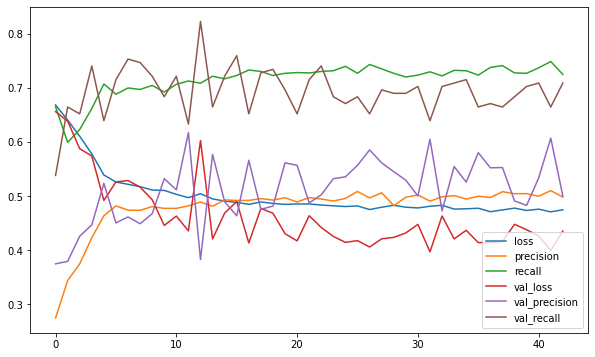

In [312]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [313]:
model.evaluate(X_test, y_test, verbose=0, return_dict=True)

{'loss': 0.5963075160980225,
 'precision': 0.3855421543121338,
 'recall': 0.7862407565116882}

In [314]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 622us/step
[[1083  510]
 [  87  320]]
              precision    recall  f1-score   support

           0       0.93      0.68      0.78      1593
           1       0.39      0.79      0.52       407

    accuracy                           0.70      2000
   macro avg       0.66      0.73      0.65      2000
weighted avg       0.82      0.70      0.73      2000



In [346]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Precision","Recall"] )
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 6, restore_best_weights = True)

model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, 
          epochs = 500, verbose=1, class_weight=sklearn_weights, callbacks = [early_stop])

Epoch 1/500
113/113 [==============================] - 1s 2ms/step - loss: 0.6770 - precision: 0.2309 - recall: 0.7534 - val_loss: 0.6558 - val_precision: 0.3135 - val_recall: 0.7342
Epoch 2/500
113/113 [==============================] - 0s 1ms/step - loss: 0.6386 - precision: 0.3102 - recall: 0.6128 - val_loss: 0.6084 - val_precision: 0.3432 - val_recall: 0.7342
Epoch 3/500
113/113 [==============================] - 0s 1ms/step - loss: 0.6102 - precision: 0.3390 - recall: 0.6352 - val_loss: 0.5587 - val_precision: 0.3693 - val_recall: 0.7152
Epoch 4/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5797 - precision: 0.3891 - recall: 0.6318 - val_loss: 0.5669 - val_precision: 0.4025 - val_recall: 0.8101
Epoch 5/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5451 - precision: 0.4256 - recall: 0.6957 - val_loss: 0.4942 - val_precision: 0.4689 - val_recall: 0.7152
Epoch 6/500
113/113 [==============================] - 0s 1ms/step - loss: 0.5325 - p

In [347]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# best score at patience = 6 , isn't good enough. "val_loss" gave better scores 

63/63 [==============================] - 0s 596us/step
[[1134  459]
 [ 111  296]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.73      0.51       407

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.71      0.74      2000



## GridSearchCV

In [154]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [149]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [368]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 20, activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 10, activation = 'relu'))
    classifier.add(Dense(units = 5, activation = 'relu'))
    classifier.add(Dropout(0.1))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ["Precision","Recall"])
    return classifier

In [397]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, 
                           patience = 8, restore_best_weights = True)

In [398]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, 
                                   epochs = 300, class_weight=sklearn_weights)

parameters = {'batch_size': [1000],
              'optimizer': [Adam, Nadam],
              'learn_rate': [0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/300
8/8 [==============================] - 1s 24ms/step - loss: 0.6984 - precision: 0.2023 - recall: 0.9429 - val_loss: 0.7046 - val_precision: 0.2053 - val_recall: 0.9873
Epoch 2/300
8/8 [==============================] - 0s 6ms/step - loss: 0.6861 - precision: 0.2147 - recall: 0.8825 - val_loss: 0.7187 - val_precision: 0.2417 - val_recall: 0.9241
Epoch 3/300
8/8 [==============================] - 0s 6ms/step - loss: 0.6746 - precision: 0.2528 - recall: 0.7704 - val_loss: 0.7275 - val_precision: 0.2695 - val_recall: 0.8734
Epoch 4/300
8/8 [==============================] - 0s 5ms/step - loss: 0.6670 - precision: 0.2841 - recall: 0.7045 - val_loss: 0.7127 - val_precision: 0.3116 - val_recall: 0.7848
Epoch 5/300
8/8 [==============================] - 0s 6ms/step - loss: 0.6611 - precision: 0.3062 - recall: 0.6243 - val_loss: 0.6943 - val_precision: 0.3314 - val_recall: 0.7089
Epoch 6/300
8/8 [===========================

8/8 [==============================] - 0s 5ms/step - loss: 0.4868 - precision: 0.4870 - recall: 0.7364 - val_loss: 0.5292 - val_precision: 0.4227 - val_recall: 0.7785
Epoch 47/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4873 - precision: 0.4728 - recall: 0.7486 - val_loss: 0.4872 - val_precision: 0.4720 - val_recall: 0.7468
Epoch 48/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4844 - precision: 0.4887 - recall: 0.7323 - val_loss: 0.4801 - val_precision: 0.4664 - val_recall: 0.7468
Epoch 48: early stopping


GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000218E9B7F850>,
             n_jobs=-1,
             param_grid={'batch_size': [1000], 'learn_rate': [0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_experimental.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [377]:
# deneme 1
print(grid_model.best_score_)
print(grid_model.best_params_)
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7196362142207653
{'batch_size': 400, 'learn_rate': 0.005, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>}
63/63 [==============================] - 0s 611us/step
[[1320  273]
 [ 147  260]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1593
           1       0.49      0.64      0.55       407

    accuracy                           0.79      2000
   macro avg       0.69      0.73      0.71      2000
weighted avg       0.82      0.79      0.80      2000



In [388]:
# deneme 2
print(grid_model.best_score_)
print(grid_model.best_params_)
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7303077475476907
{'batch_size': 1000, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>}
63/63 [==============================] - 0s 707us/step
[[1289  304]
 [ 143  264]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1593
           1       0.46      0.65      0.54       407

    accuracy                           0.78      2000
   macro avg       0.68      0.73      0.70      2000
weighted avg       0.81      0.78      0.79      2000



In [399]:
# deneme 3, the best score 
print(grid_model.best_score_)
print(grid_model.best_params_)
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7355558243533142
{'batch_size': 1000, 'learn_rate': 0.005, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>}
63/63 [==============================] - 0s 592us/step
[[1344  249]
 [ 149  258]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1593
           1       0.51      0.63      0.56       407

    accuracy                           0.80      2000
   macro avg       0.70      0.74      0.72      2000
weighted avg       0.82      0.80      0.81      2000



In [400]:
grid_model.best_score_

0.7355558243533142

In [401]:
grid_model.best_params_

{'batch_size': 1000,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_experimental.nadam.Nadam}

In [402]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1344  249]
 [ 149  258]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1593
           1       0.51      0.63      0.56       407

    accuracy                           0.80      2000
   macro avg       0.70      0.74      0.72      2000
weighted avg       0.82      0.80      0.81      2000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

63/63 [==============================] - 0s 1ms/step


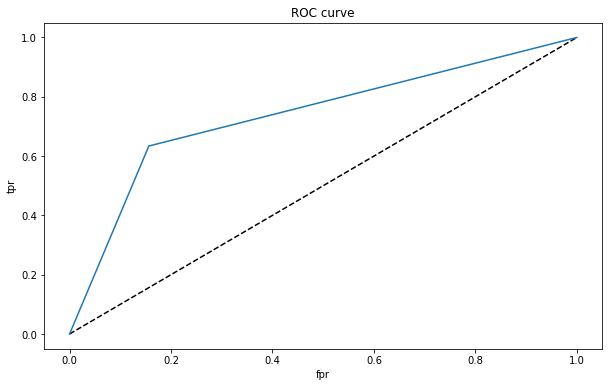

In [407]:
y_pred_proba = grid_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [408]:
roc_auc_score(y_test, y_pred_proba)

0.7387988913412643

# Final Model and Model Deployment

In [413]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [423]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(learning_rate = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Precision","Recall"] )

early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, 
          epochs = 500, verbose=1, class_weight=sklearn_weights, callbacks = [early_stop])

Epoch 1/500
113/113 [==============================] - 1s 4ms/step - loss: 0.6816 - precision: 0.2573 - recall: 0.5802 - val_loss: 0.5681 - val_precision: 0.4438 - val_recall: 0.4747
Epoch 2/500
113/113 [==============================] - 0s 2ms/step - loss: 0.6556 - precision: 0.2968 - recall: 0.6515 - val_loss: 0.5817 - val_precision: 0.3474 - val_recall: 0.6772
Epoch 3/500
113/113 [==============================] - 0s 2ms/step - loss: 0.6356 - precision: 0.3103 - recall: 0.7133 - val_loss: 0.5480 - val_precision: 0.3633 - val_recall: 0.6899
Epoch 4/500
113/113 [==============================] - 0s 2ms/step - loss: 0.6213 - precision: 0.3226 - recall: 0.7038 - val_loss: 0.5341 - val_precision: 0.3939 - val_recall: 0.7405
Epoch 5/500
113/113 [==============================] - 0s 2ms/step - loss: 0.6049 - precision: 0.3511 - recall: 0.7323 - val_loss: 0.5804 - val_precision: 0.3832 - val_recall: 0.7785
Epoch 6/500
113/113 [==============================] - 0s 2ms/step - loss: 0.5838 - p

<AxesSubplot:>

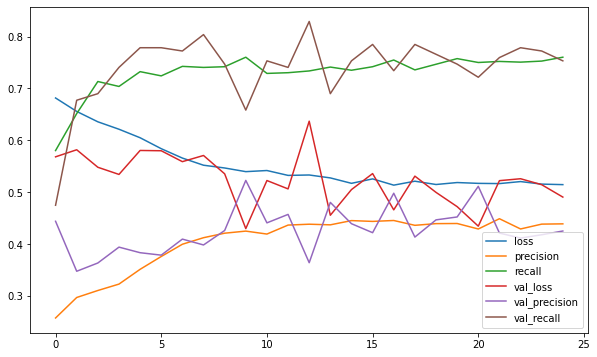

In [424]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [425]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1389  204]
 [ 181  226]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1593
           1       0.53      0.56      0.54       407

    accuracy                           0.81      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.81      0.81      0.81      2000



In [426]:
model.save('model_churn.h5')

## Loading Model and Scaler

In [427]:
from tensorflow.keras.models import load_model

In [428]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

## Prediction

In [429]:
single_pred = {"CreditScore" : 600,
               "Gender": 1,
               "Age" : 50,
               "Tenure": 3,
               "Balance": 50000,
               "NumOfProducts": 1,
               "HasCrCard" : 1,
               "IsActiveMember": 1,
               "EstimatedSalary": 120000,
               "Geography_France":1,
               "Geography_Germany":0,
               "Geography_Spain":0}

In [431]:
single_pred = scaler_churn.transform(single_patient)
single_pred

array([[0.538     , 1.        , 0.3164557 , 0.2       , 0.        ,
        0.        , 1.        , 1.        , 0.50678999, 1.        ,
        0.        , 0.        ]])

In [432]:
(model_churn.predict(single_pred) > 0.5).astype("int32")

1/1 [==============================] - 0s 61ms/step


array([[0]])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___